<img src = "https://freepngimg.com/download/python_logo/7-2-python-logo-free-download-png-thumb.png" width="50"> </p>
*Python 3.10.2*
***
# <font size="5">*Alexander A. Nazarov, 2022*
### <center> <font size="6"> ***Проверка автокорреляции с использованием критерия Дарбина-Уотсона средствами Python.</p>***

### <center> <font size="6"> ***Checking the autocorrelation using the Durbin-Watson test with Python</p>***
***

In [1]:
import time
start_time_0 = time.time()

Подключение модулей и библиотек:

In [2]:
# Стандартные модули и библиотеки

import os    # загрузка модуля для работы с операционной системой
import sys
import re
import platform
print('{:<35}{:^0}'.format("Текущая версия Python: ", platform.python_version()), '\n')

import math
from math import *    # подключаем все содержимое модуля math, используем без псевдонимов

import numpy as np
#print ("Текущая версия модуля numpy: ", np.__version__)
print('{:<35}{:^0}'.format("Текущая версия модуля numpy: ", np.__version__))
from numpy import nan

import scipy as sci
print('{:<35}{:^0}'.format("Текущая версия модуля scipy: ", sci.__version__))
import scipy.stats as sps

import pandas as pd
print('{:<35}{:^0}'.format("Текущая версия модуля pandas: ", pd.__version__))

import matplotlib as mpl
print('{:<35}{:^0}'.format("Текущая версия модуля matplotlib: ", mpl.__version__))
import matplotlib.pyplot as plt

import seaborn as sns
print('{:<35}{:^0}'.format("Текущая версия модуля seaborn: ", sns.__version__))

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
print('{:<35}{:^0}'.format("Текущая версия модуля statsmodels: ", sm.__version__))

import statistics as stat    # module 'statistics' has no attribute '__version__'

import sympy as sym
print('{:<35}{:^0}'.format("Текущая версия модуля sympy: ", sym.__version__))

# Настройки numpy
np.set_printoptions(precision = 4, floatmode='fixed')

# Настройки Pandas
pd.set_option('display.max_colwidth', None)    # текст в ячейке отражался полностью вне зависимости от длины
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Настройки seaborn
sns.set_style("darkgrid")
sns.set_context(context='paper', font_scale=1, rc=None)    # 'paper', 'notebook', 'talk', 'poster', None

# Настройки Mathplotlib
f_size = 8    # пользовательская переменная для задания базового размера шрифта
plt.rcParams['figure.titlesize'] = f_size + 12    # шрифт заголовка
plt.rcParams['axes.titlesize'] = f_size + 10      # шрифт заголовка
plt.rcParams['axes.labelsize'] = f_size + 6       # шрифт подписей осей
plt.rcParams['xtick.labelsize'] = f_size + 4      # шрифт подписей меток
plt.rcParams['ytick.labelsize'] = f_size + 4
plt.rcParams['legend.fontsize'] = f_size + 6      # шрифт легенды
plt.rcParams['text.usetex'] = False    # поддержка TeX

Текущая версия Python:             3.10.2 

Текущая версия модуля numpy:       1.22.2
Текущая версия модуля scipy:       1.8.0
Текущая версия модуля pandas:      1.4.1
Текущая версия модуля matplotlib:  3.5.1
Текущая версия модуля seaborn:     0.11.2
Текущая версия модуля statsmodels: 0.13.2
Текущая версия модуля sympy:       1.9


In [3]:
# Пользовательские модули и библиотеки

Text1 = os.getcwd()    # вывод пути к текущему каталогу
#print(f"Текущий каталог: {Text1}")

sys.path.insert(1, "D:\SKILL FACTORY\REPOSITORY\MyModulePython")

from my_module__stat import *

Прочие настройки:

In [4]:
# Константы
INCH = 25.4    # мм/дюйм
DecPlace = 5    # number of decimal places - число знаков после запятой

Доверительная вероятность и уровень значимости:

In [5]:
p_level = 0.95
a_level = 1 - p_level   

### <center> <font size="6"> <u>***ПОСТАНОВКА ЗАДАЧИ***</u>

**Критерий Дарбина-Уотсона (Durbin–Watson statistic)** - один из самых распространенных критериев для проверки автокорреляции. 

Данный критерий входит в стандартный инструментарий **python**:
* присутствует в таблице выдачи результатов регрессионного анализа модуля линейной регрессии **Linear Regression** (https://www.statsmodels.org/stable/regression.html);
* может быть рассчитан с помощью функции **statsmodels.stats.stattools.durbin_watson** (https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html).

К сожалению, стандартные инструменты **python** не позволяют получить табличные значения статистики критерия Дарбина-Уотсона, нам предлагается воспользоваться методом грубой оценки: считается, что при расчетном значении статистики критерия в интервале **[1; 2]** автокорреляция отсутствует (см. https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic). Однако, для качественного статистического анализа такой подход неприемлем.

Представляет интерес реализовать в полной мере критерий Дарбина-Уотсона средствами **python**, добавив этот важный критерий в инструментарий специалиста **DataScience**.

В данном обзоре мы коснемся только собственно критерия Дарбина-Уотсона и его применения для выявления автокорреляции. Особенности построения регрессионных моделей и прогнозирования в условиях автокорреляции (двухшаговый метод наименьших квадратов и пр.) мы рассматривать не будем.

#### <u>***Применение пользовательских функций***</u>

Как и в предыдущем обзоре, здесь будут использованы несколько пользовательских функций для решения разнообразных задач. Все эти функции созданы для облегчения работы и уменьшения размера программного кода. Данные функции загружается из пользовательского модуля **my_module__stat.py**, который доступен в моем репозитории на GitHub (https://github.com/AANazarov/MyModulePython).

Вот перечень данных функций:
* **graph_plot_sns_np** - функция строит линейный график средствами **seaborn**;
* **graph_regression_plot_sns** - функция строит график регрессионной модели и график остатков средствами **seaborn**;
* **regression_error_metrics** - функция возвращает ошибки аппроксимации регрессионной модели;
* **graph_hist_boxplot_probplot_sns** - функция позволяет визуализировать исходные данные для одной переменной путем одновременного построения гистограммы, коробчатой диаграммы и вероятностного графика средствами **seaborn**; имеется возможность выбирать, какие графики строить (h - hist, b - boxplot, p - probplot);
* **norm_distr_check** - проверка нормальности распределения исходных данных с использованием набора из нескольких статистических тестов.
* **Goldfeld_Quandt_test**, **Breush_Pagan_test**, **White_test** - проверка гетероскедастичности с использование тестов Голдфелда-Квандта, Бриша-Пэгана и Уайта соответственно;
* **graph_regression_pair_predict_plot_sns** - прогнозирование: построение графика регрессионной модели (с доверительными интервалами) и вывод расчетной таблицы с данными для заданной области значений **X**.

В процессе данного обзора мы создаем пользовательскую функцию **Durbin_Watson_test**, которая проверяет гипотезу о наличии автокорреляции (она тоже включена в пользовательский модуль **my_module__stat.py**).

### <center> <font size="6"> <u>***ОСНОВЫ ТЕОРИИ***</u>

Информацию о критерии Дарбина-Уотсона можно почерпнуть в [1, с.659], [2, с.117], [3, с.239], [4, с.188], а также:
* https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic
* https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%94%D0%B0%D1%80%D0%B1%D0%B8%D0%BD%D0%B0_%E2%80%94_%D0%A3%D0%BE%D1%82%D1%81%D0%BE%D0%BD%D0%B0

Итак, предположим, мы рассматриваем регрессионную модель:

$$ y_i = b_0 + \displaystyle\sum_{j=1}^{m} b_j x_{ij} + \varepsilon_i, \quad i=\overline{1,n}$$
$$ \widehat{y}_i = b_0 + \displaystyle\sum_{j=1}^{m} b_j x_{ij}, \quad i=\overline{1,n}$$

или в матричном виде:

$$ \textbf{Y} = \textbf{X}b + \varepsilon $$
$$ \widehat{\textbf{Y}} = \textbf{X}b $$

Критерий Дарбина-Уотсона применяется в ситуации, когда регрессионные остатки связаны **автокорреляционной зависимостью 1-го порядка** [2, с.111]:

$$ \varepsilon_i = \rho \varepsilon_{i-1} + \delta_i, \quad i=\overline{2,n}$$

где $\rho$ - некоторое число ($|\rho|<1$), а случайные величины $\delta_i$ удовлетворяют требованиям, предъявляемым к регрессионным остаткам классической модели (т.е. равенство нулю среднего значения, постоянство дисперсии и некоррелированность между собой):

$$E(\delta_i)=0$$
$$ E(\delta_i\delta_j)=
\begin{cases}
{\sigma_0}^2, & \quad i=j \\
0, & \quad i \neq j
\end{cases} $$

Проверяется **нулевая гипотеза** об <u>отсутствии автокорреляции</u>:

$\begin{aligned}
\qquad H_0: \rho = 0
\end{aligned}$

**Альтернативной гипотезой** может быть:
* существование отрицательной автокорреляции (левосторонняя критическая область):

$\begin{aligned}
\qquad H_1: \rho < 0
\end{aligned}$  

* существование положительной автокорреляции (правосторонняя критическая область):

$\begin{aligned}
\qquad H_1: \rho > 0
\end{aligned}$  

* существование автокорреляции вообще (двусторонняя критическая область):

$\begin{aligned}
\qquad H_1: \rho \neq 0
\end{aligned}$  

**Расчетное значение** статистики критерия Дарбина-Уотсона имеет вид:

$$ DW_{calc} = \frac {\displaystyle\sum_{i=2}^{n} (\varepsilon_i - \varepsilon_{i-1})^2} {{\displaystyle\sum_{i=1}^{n} {\varepsilon_i}^2}} $$

где $\varepsilon_i = y_i - \widehat{y}_i$ - остатки (невязки) регрессионной модели.

По таблицам (см. [1, с.659],  [2, с.402], [3, с.291]) в зависимости от уровня значимости $\alpha_{level}$ (5%, 2.5%, 1%), числа параметров регрессионной модели $m$ (кроме свободного члена $b_0$) (от 1 до 5) и объема выборки $n$ (от 15 до 100) определяются **критические значения статистики Дарбина-Уотсона**: <u>нижний</u> $d_L$ и <u>верхний</u> $d_U$ предел.

Правила принятия гипотез по критерию Дарбина-Уотсона выглядят довольно своеобразно - критические значения образуют <u>пять областей</u> различных статистических решений (причем критические границы принятия $H_0$ и непринятия $H_1$ не совпадают):

|Значение $DW_{calc}$             |Принимается гипотеза                          |Вывод                            |
|:-------------------------------:|:--------------------------------------------:|:-------------------------------:|
|$0 \leq DW_{calc} < d_L$         |отвергается $H_0$, принимается $H_1: \rho > 0$|есть положительная автокорреляция|
|$d_L \leq DW_{calc} \leq d_U$    |                                              |неопределенность                 |
|$d_U < DW_{calc} < 4-d_U$        |принимается $H_0$                             |автокорреляция отсутствует       |
|$4-d_U \leq DW_{calc} \leq 4-d_L$|                                              |неопределенность                 |
|$4-d_L < DW_{calc} \leq 4$       |отвергается $H_0$, принимается $H_1: \rho < 0$|есть отрицательная автокорреляция|

Есть очень удачная мнемоническая схема, приведенная в [3, с.240]:

![Getting Started](Image/Image_01.jpg)

<u>**Особенности критерия Дарбина-Уотсона:**</u>

1. Критические значения критерия табулированы для объема выборки от 15 до 100, аппроксимаций мне обнаружить не удалось. При меньших значениях критерий применять нельзя, при больших - очевидно, приходиться пользоваться грубым оценочным правилом: при расчетном значении статистики критерия в интервале [1; 2] автокорреляция отсутствует (см. https://en.wikipedia.org/wiki/Durbin–Watson_statistic).
2. Критерий позволяет выявить только автокорреляцию 1-го порядка. Отклонение нулевой гипотезы не означает, что автокорреляции нет вообще - возможно наличие автокорреляции более высоких порядков.
3. Критерий построен в предположении, что регрессоры $\textbf{X}$ и ошибки $\varepsilon$ не коррелированы, поэтому его нельзя применять, в частности, для моделей авторегрессии [4, с.191].
4. Критерий не подходит для моделей без свободного члена $b_0$.
5. Критерий имеет зону неопределенности, когда нет оснований ни принимать, ни отвергать нулевую гипотезу.
6. Между статистикой критерия и коэффициентом автокорреляции существует приближенное соотношение:

$$ DW_{calc} \approx 2 \cdot (1-\rho) $$

Существуют и другие критерии для проверки автокорреляции (тест Бройша-Годфри, Льюнга-Бокса и пр.).

Как было указано выше, большой проблемой является отсутствие табличных значений статистики критерия Дарбина-Уостона в стандартном инструментарии **python**. Для реализации возможностей данного критерия в полном объеме нам потребуется оцифровка весьма объемных таблиц критических значений.

### <center> <font size="6"> <u>***ОЦИФРОВКА ТАБЛИЧНЫХ ЗНАЧЕНИЙ СТАТИСТИКИ КРИТЕРИЯ ДАРБИНА-УОТСОНА***</u>

Я решил добавить в обзор этот раздел, хотя, строго говоря, можно было обойтись и без него, а сразу воспользоваться оцифрованными таблицами статистики критерия Дарбина-Уотсона.

Однако, если мы хотим выполнять качественный статистический анализ, неизбежно придется работать с большим количеством статистических критериев и далеко не все из них реализованы в **python**. Критерий Дарбина-Уотсона - это только один из многих. Количество критериев, рассматриваемых в литературе по прикладной статистике в последние годы постоянно увеличивается. Специалисту придется реализовывать многие критерии самостоятельно и одна из проблем, с которой придется столкнуться - это таблицы критических значений. Далеко не все табличные значения имеют аппроксимации, а значит придется каким-то образом оцифровывать эти таблицы. Небольшие таблицы можно сохранить в файлах вручную, а вот такой подход с объемными таблицами (как в нашем случае) - это слишком непроизводительно и нерационально.

В общем, на мой взгляд, представляет интерес разобрать пример оцифровки статистических таблиц на примере нашего критерия Дарбина-Уотсона - это позволит специалистам сэкономить человеко-часы работы и облегчить совершенствование инструментов статистического анализа.

Замечу сразу, что я не являюсь глубоким специалистом в области анализа и обработки изображений и текстов на **python** - это не совсем мой профиль. Профессионалы в этой области, возможно, раскритикуют то, как решается поставленная задача и предложат более удачное решение. Если будет так - то заранее спасибо. Я же эту задачу старался решить наиболее простым и рациональным способом, доступным для широкого круга специалистов. На всякий случай могу процитировать Давоса Сиворта из "Игры престолов": "Простите за то, что увидите".

#### <u>***Алгоритм действий***</u>

Для оцифровки я использовал таблицы, приведенные в [3, с.290-292].

1. Сканируем таблицы, сохраняем в виде jpg-файлов (**Durbin_Watson_test_1.jpg**, **Durbin_Watson_test_2.jpg**, **Durbin_Watson_test_3.jpg**) в папке **text_processing**, расположенной внутри папки с рабочим **.ipynb-файлом**:
   
![Getting Started](text_processing/Durbin_Watson_test_1.jpg)
![Getting Started](text_processing/Durbin_Watson_test_2.jpg)
![Getting Started](text_processing/Durbin_Watson_test_3.jpg)

2. Распознаем текст (я воспользовался онлайн-сервисом https://convertio.co/), полученные текстовые файлы **Durbin-Watson-test-1.ocr.txt**, **Durbin-Watson-test-2.ocr.txt**, **Durbin-Watson-test-3.ocr.txt** также помещаем в папке **text_processing**.

3. Откроем файлы, запишем содержимое файлов в переменные, каждая из которых соответствует одной странице:

In [6]:
with open('text_processing\Durbin-Watson-test-1.ocr.txt') as f1:
    Durbin_Watson_test_1 = f1.readlines()
display(Durbin_Watson_test_1, type(Durbin_Watson_test_1), len(Durbin_Watson_test_1))

['п»їРўР°Р±Р»РёС†Р° 8\n',
 'РљСЂРёС‚РёС‡РµСЃРєРёРµ Р·РЅР°С‡РµРЅРёСЏ СЃС‚Р°С‚РёСЃС‚РёРєРё Р”Р°СЂРІРёРЅР° вЂ” РЈРѕС‚СЃРѕРЅР° РїСЂРё 5%-РЅРѕРј\n',
 'СѓСЂРѕРІРЅРµ Р·РЅР°С‡РёРјРѕСЃС‚Рё\n',
 '\tРїРі\t\t\t\t\t\t\t\t\t\n',
 'С‚\t1\t\t2\t\t3\t\t4\t\t5\t\n',
 '\t<*В«\tвЂњРІ\t\t\t"РЅ\t\tВ«РЅ\tВ«РІ\t\t\n',
 '15\t1,08\t1,36\t0,95\t1,54\t0,82\t1,75\t0,69\t1,97\t0,56\t2,21\n',
 '16\t1,10\t1,37\t0,98\t1,54\t0,86\t1.73\t0.74\t1,93\t0,62\t2,15\n',
 '17\t1,13\t1,38\t1,02\t1,54\t0,90\t1.71\t0,78\t1,90\t0,67\t2,10\n',
 '18\t1,16\t1,39\t1,05\t1,53\t0,93\t1,69\t0,82\t1,87\t0,71\t2,06\n',
 '19\t!, 18\t1,40\t1,08\t1,53\t0,97\t1,68\t0,86\t1,85\t0,75\t2,02\n',
 '20\t1,20\t1,41\t1,10\t1,54\t1,00\t1,68\t0,90\t1,83\t0,79\t1,99\n',
 '21\t1,22\t1,42\t1,13\t1,54\t1,03\t1.67\t0,93\t1,81\t0,83\t1,96\n',
 '22\t1,24\t1,43\t1,15\t1,54\t1,05\t1,66\t0,96\t1,80\t0,86\t1,94\n',
 '23\t1,26\t1,44\tРњ7\t1,54\t1,08\t1,66\t0,99\t1,79\t0,90\t1,92\n',
 '24\t1,27\t1,45\t1,19\t1,55\t1.10\t1,66\t1,01\t1.78\t0,93\t1,90\n',
 '25\t1,29\t1,

list

44

In [7]:
with open('text_processing\Durbin-Watson-test-2.ocr.txt') as f2:
    Durbin_Watson_test_2 = f2.readlines()
display(Durbin_Watson_test_2, type(Durbin_Watson_test_2), len(Durbin_Watson_test_2))

['п»їРўР°Р±Р»РёС†Р° 8Р°\n',
 'РљСЂРёС‚РёС‡РµСЃРєРёРµ Р·РЅР°С‡РµРЅРёСЏ СЃС‚Р°С‚РёСЃС‚РёРєРё Р”Р°СЂР±РёРЅР° вЂ” РЈРѕС‚СЃРѕРЅР° РїСЂРё 2,5%-РЅРѕРј\n',
 'СѓСЂРѕРІРЅРµ Р·РЅР°С‡РёРјРѕСЃС‚Рё\n',
 '\tРіРї\t\t\t\t\t\t\t\t\t\n',
 'С‚\t1\t\t2\t\t3\t\t4\t\t5\t\n',
 "\t\t\t\t'РІ\t\t*РІ\tвЂњРЅ\t\t*Рї\t\n",
 '15\t0,95\t1,23\t0,83\t1,40\t0,71\t1,61\t0,59\t1,84\t0.48\t2,09\n',
 '16\t0,98\t1,24\t0,86\t1,40\t0,75\t1,59\t0,64\t1.80\t0,53\t2,03\n',
 '17\t1,01\t1,25\t0,90\t1,40\t0,79\t1,58\t0,68\t1Р›\t0,57\t1,98\n',
 '18\t1,03\t1.26\t0,93\t1,40\t0,82\t1,56\t0,72\t1,74\t0,62\t1,93\n',
 '19\t1,06\t1,28\t0.96\t1,41\t0,86\t1,55\t0.76\t1,72\t0,66\t1,90\n',
 '20\t1,08\t1,28\t0,99\t1,41\t0,89\t1,55\t0,79\t1.70\t0,70\t1,87\n',
 '21\t1,10\t1,30\t1.01\t1,41\t0.92\t1,54\t0,83\t1,69\t0,73\t1,84\n',
 '22\t1,12\t1,31\t1,04\t1,42\t0,95\t1,54\t0,86\t1,68\t0,77\t1,82\n',
 '23\t1,14\t1.32\t1.06\t1,42\t0,97\t1,54\t0.89\t1.67\t0,80\t1.80\n',
 '24\t1,16\t1,33\t1,08\t1,43\t1,00\t1,54\t0,91\t1,66\t0,83\t1,79\n',
 '25\t1,18\t1,34\

list

44

In [8]:
with open('text_processing\Durbin-Watson-test-3.ocr.txt') as f3:
    Durbin_Watson_test_3 = f3.readlines()
display(Durbin_Watson_test_3, type(Durbin_Watson_test_3), len(Durbin_Watson_test_3))

['п»їРўР°Р±Р»РёС†Р° 86\n',
 'РљСЂРёС‚РёС‡РµСЃРєРёРµ Р·РЅР°С‡РµРЅРёСЏ СЃС‚Р°С‚РёСЃС‚РёРєРё Р”Р°СЂР±РёРЅР°вЂ” РЈРѕС‚СЃРѕРЅР° РїСЂРё 1%-РЅРѕРј СѓСЂРѕРІРЅРµ Р·РЅР°С‡РёРјРѕСЃС‚Рё\n',
 'С‚\n',
 'Рў\t1\t\t2\t\t3\t\t4\t\t\t5\t\n',
 '\t\t\t\t\t\t<*РІ\t\t\t\t\t*РІ\n',
 '15\t0,81\t1,07\t0,70\t1,25\t0,59\t1,46\t0,49\t\t1,70\t0,39\t1,96\n',
 '16\t0,84\t1,09\t0,74\t1,25\t0,63\t1,44\t0,53\t\t1,66\t0,44\t1,90\n',
 '17\t0,87\t1,10\t0,77\t1,25\t0,67\t1,43\t0,57\t\t1,63\t0,18\t1,85\n',
 '18\t0,90\t1.12\t0,80\t1,26\t0,71\t1,42\t0,61\t\t1,60\t0,52\t1,80\n',
 '19\t0,93\t1,13\t0,83\t1,26\t0,74\t1.41\t0,65\t\t1,58\t0,56\t1.77\n',
 '20\t0,95\t1,15\t0,86\t1,27\t0,77\t1,41\t0,68\t\t1,57\t0,60\t1.74\n',
 '21\t0,97\t1,16\t0,89\t1,27\t0,80\t1,41\t0,72\t\t1,55\t0,63\t1.71\n',
 '22\t1,00\t1.17\t0,91\t1,28\t0,83\t1,40\t0,75\t\t1,54\t0,66\t1,69\n',
 '23\t1,02\t1,19\t0,94\t1,29\t0,86\t1,40\t0,77\t\t1,53\t0,70\t1,67\n',
 '24\t1,04\t1,20\t0,96\t1,30\t0,88\t1,41\t0,80\t\t1,53\t0,72\t1.66\n',
 '25 вЂў\t1,05\t1,21\t0,98\t1,3

list

43

Видим, что переменные представляют собой списки, элементами которых является строки.

Для облегчения дальнейшей обработки данных создадим список, элементами которого являются переменные-страницы:

In [9]:
Durbin_Watson_test = [Durbin_Watson_test_1, Durbin_Watson_test_2, Durbin_Watson_test_3]

4. Исключаем все строки, которые начинаются не с цифр; при этом воспользуемся алгоритмом перезаписи списка:

In [10]:
# создаем новый список
Durbin_Watson_test_new = list()

# удаляем строки
for page in Durbin_Watson_test:
    page_temp = list()    # временная страница
    for line in page:
        if line[0].isdigit():
            page_temp.append(line)    # перезаписываем список
    Durbin_Watson_test_new.append(page_temp)

# выводим новый перезаписанный список, элементами которого являются страницы с исключенными лишними строками
for page in Durbin_Watson_test_new:
    display(page, type(page), len(page))

['15\t1,08\t1,36\t0,95\t1,54\t0,82\t1,75\t0,69\t1,97\t0,56\t2,21\n',
 '16\t1,10\t1,37\t0,98\t1,54\t0,86\t1.73\t0.74\t1,93\t0,62\t2,15\n',
 '17\t1,13\t1,38\t1,02\t1,54\t0,90\t1.71\t0,78\t1,90\t0,67\t2,10\n',
 '18\t1,16\t1,39\t1,05\t1,53\t0,93\t1,69\t0,82\t1,87\t0,71\t2,06\n',
 '19\t!, 18\t1,40\t1,08\t1,53\t0,97\t1,68\t0,86\t1,85\t0,75\t2,02\n',
 '20\t1,20\t1,41\t1,10\t1,54\t1,00\t1,68\t0,90\t1,83\t0,79\t1,99\n',
 '21\t1,22\t1,42\t1,13\t1,54\t1,03\t1.67\t0,93\t1,81\t0,83\t1,96\n',
 '22\t1,24\t1,43\t1,15\t1,54\t1,05\t1,66\t0,96\t1,80\t0,86\t1,94\n',
 '23\t1,26\t1,44\tРњ7\t1,54\t1,08\t1,66\t0,99\t1,79\t0,90\t1,92\n',
 '24\t1,27\t1,45\t1,19\t1,55\t1.10\t1,66\t1,01\t1.78\t0,93\t1,90\n',
 '25\t1,29\t1,45\t1/21\t1,55\t1.12\t1,66\t1,04\t1,77\t0,95\t1,89\n',
 '26\t1,30\t1,46\t1,22\t1,55\t1,14\t1,65\t1.06\t1,76\t0,98\t1,88\n',
 '27\t1,32\t1,47\t1,24\t1.56\t1,16\t1,65\t1,08\t1,76\t1,01\t1,86\n',
 '28\t1,33\t1,48\t1,26\t1,56\t1,18\t1,65\t1,10\t1,75\t1,03\t1,85\n',
 '29\t1,34\t1.48\t1,27\t1,56\t1,20

list

38

['15\t0,95\t1,23\t0,83\t1,40\t0,71\t1,61\t0,59\t1,84\t0.48\t2,09\n',
 '16\t0,98\t1,24\t0,86\t1,40\t0,75\t1,59\t0,64\t1.80\t0,53\t2,03\n',
 '17\t1,01\t1,25\t0,90\t1,40\t0,79\t1,58\t0,68\t1Р›\t0,57\t1,98\n',
 '18\t1,03\t1.26\t0,93\t1,40\t0,82\t1,56\t0,72\t1,74\t0,62\t1,93\n',
 '19\t1,06\t1,28\t0.96\t1,41\t0,86\t1,55\t0.76\t1,72\t0,66\t1,90\n',
 '20\t1,08\t1,28\t0,99\t1,41\t0,89\t1,55\t0,79\t1.70\t0,70\t1,87\n',
 '21\t1,10\t1,30\t1.01\t1,41\t0.92\t1,54\t0,83\t1,69\t0,73\t1,84\n',
 '22\t1,12\t1,31\t1,04\t1,42\t0,95\t1,54\t0,86\t1,68\t0,77\t1,82\n',
 '23\t1,14\t1.32\t1.06\t1,42\t0,97\t1,54\t0.89\t1.67\t0,80\t1.80\n',
 '24\t1,16\t1,33\t1,08\t1,43\t1,00\t1,54\t0,91\t1,66\t0,83\t1,79\n',
 '25\t1,18\t1,34\t1.10\t1,43\t1,02\t1,54\t0,94\t1,65\t0,80\t1 77\n',
 '26\t1.19\t1,35\t1,12\t1,44\t1,04\t1,54\t0.96\t1,65\t0,88\t1.76\n',
 '27\t1.21\t1,36\t1,13\t1,44\t1,06\t1,54\t0.99\t1,64\t0,91\t1.75\n',
 '28\t1,22\t1,37\t1.15\t1,45\t1,08\t1,54\t1.01\t1.64\t0,93\t1.74\n',
 '29\t1,24\t1,38\t1,17\t1,45\t1,10\

list

38

['15\t0,81\t1,07\t0,70\t1,25\t0,59\t1,46\t0,49\t\t1,70\t0,39\t1,96\n',
 '16\t0,84\t1,09\t0,74\t1,25\t0,63\t1,44\t0,53\t\t1,66\t0,44\t1,90\n',
 '17\t0,87\t1,10\t0,77\t1,25\t0,67\t1,43\t0,57\t\t1,63\t0,18\t1,85\n',
 '18\t0,90\t1.12\t0,80\t1,26\t0,71\t1,42\t0,61\t\t1,60\t0,52\t1,80\n',
 '19\t0,93\t1,13\t0,83\t1,26\t0,74\t1.41\t0,65\t\t1,58\t0,56\t1.77\n',
 '20\t0,95\t1,15\t0,86\t1,27\t0,77\t1,41\t0,68\t\t1,57\t0,60\t1.74\n',
 '21\t0,97\t1,16\t0,89\t1,27\t0,80\t1,41\t0,72\t\t1,55\t0,63\t1.71\n',
 '22\t1,00\t1.17\t0,91\t1,28\t0,83\t1,40\t0,75\t\t1,54\t0,66\t1,69\n',
 '23\t1,02\t1,19\t0,94\t1,29\t0,86\t1,40\t0,77\t\t1,53\t0,70\t1,67\n',
 '24\t1,04\t1,20\t0,96\t1,30\t0,88\t1,41\t0,80\t\t1,53\t0,72\t1.66\n',
 '25 вЂў\t1,05\t1,21\t0,98\t1,30\t0,90\t1,41\t0,83\t\t1,52\t0,75\t1,65\n',
 '26\t1,07\t1,22\t1,00\t1,31\t0,93\t1.41\t0.85\t\t1,52\t0,78\t1,64\n',
 '27\t1,09\t1,23\t1,02\t1,32\t0,95\t1.41\t0.88\t\t1,51\t0,81\t1,63\n',
 '28 1\t1,10\t1,24\t1,04\t1,32\t0,97\t1,41\t0,90\t\t1,51\t0,83\t1.62\n',


list

38

5. Исключаем из текста управляющие символы (\t, \n) - с помощью регулярных выражений (regex) (модуль **re**):

In [11]:
# задаем шаблон для удаления символов
pattern = r'[\t+\n+]'    

# выполняем обработку
Durbin_Watson_test_new = [
    [re.sub(pattern, '  ', elem) for elem in page] 
    for page in Durbin_Watson_test_new]

# выводим обработнный список    
for page in Durbin_Watson_test_new:
    display(page)    

['15  1,08  1,36  0,95  1,54  0,82  1,75  0,69  1,97  0,56  2,21  ',
 '16  1,10  1,37  0,98  1,54  0,86  1.73  0.74  1,93  0,62  2,15  ',
 '17  1,13  1,38  1,02  1,54  0,90  1.71  0,78  1,90  0,67  2,10  ',
 '18  1,16  1,39  1,05  1,53  0,93  1,69  0,82  1,87  0,71  2,06  ',
 '19  !, 18  1,40  1,08  1,53  0,97  1,68  0,86  1,85  0,75  2,02  ',
 '20  1,20  1,41  1,10  1,54  1,00  1,68  0,90  1,83  0,79  1,99  ',
 '21  1,22  1,42  1,13  1,54  1,03  1.67  0,93  1,81  0,83  1,96  ',
 '22  1,24  1,43  1,15  1,54  1,05  1,66  0,96  1,80  0,86  1,94  ',
 '23  1,26  1,44  Рњ7  1,54  1,08  1,66  0,99  1,79  0,90  1,92  ',
 '24  1,27  1,45  1,19  1,55  1.10  1,66  1,01  1.78  0,93  1,90  ',
 '25  1,29  1,45  1/21  1,55  1.12  1,66  1,04  1,77  0,95  1,89  ',
 '26  1,30  1,46  1,22  1,55  1,14  1,65  1.06  1,76  0,98  1,88  ',
 '27  1,32  1,47  1,24  1.56  1,16  1,65  1,08  1,76  1,01  1,86  ',
 '28  1,33  1,48  1,26  1,56  1,18  1,65  1,10  1,75  1,03  1,85  ',
 '29  1,34  1.48  1,27  1,56  1,20

['15  0,95  1,23  0,83  1,40  0,71  1,61  0,59  1,84  0.48  2,09  ',
 '16  0,98  1,24  0,86  1,40  0,75  1,59  0,64  1.80  0,53  2,03  ',
 '17  1,01  1,25  0,90  1,40  0,79  1,58  0,68  1Р›  0,57  1,98  ',
 '18  1,03  1.26  0,93  1,40  0,82  1,56  0,72  1,74  0,62  1,93  ',
 '19  1,06  1,28  0.96  1,41  0,86  1,55  0.76  1,72  0,66  1,90  ',
 '20  1,08  1,28  0,99  1,41  0,89  1,55  0,79  1.70  0,70  1,87  ',
 '21  1,10  1,30  1.01  1,41  0.92  1,54  0,83  1,69  0,73  1,84  ',
 '22  1,12  1,31  1,04  1,42  0,95  1,54  0,86  1,68  0,77  1,82  ',
 '23  1,14  1.32  1.06  1,42  0,97  1,54  0.89  1.67  0,80  1.80  ',
 '24  1,16  1,33  1,08  1,43  1,00  1,54  0,91  1,66  0,83  1,79  ',
 '25  1,18  1,34  1.10  1,43  1,02  1,54  0,94  1,65  0,80  1 77  ',
 '26  1.19  1,35  1,12  1,44  1,04  1,54  0.96  1,65  0,88  1.76  ',
 '27  1.21  1,36  1,13  1,44  1,06  1,54  0.99  1,64  0,91  1.75  ',
 '28  1,22  1,37  1.15  1,45  1,08  1,54  1.01  1.64  0,93  1.74  ',
 '29  1,24  1,38  1,17  1,45  1,10 

['15  0,81  1,07  0,70  1,25  0,59  1,46  0,49    1,70  0,39  1,96  ',
 '16  0,84  1,09  0,74  1,25  0,63  1,44  0,53    1,66  0,44  1,90  ',
 '17  0,87  1,10  0,77  1,25  0,67  1,43  0,57    1,63  0,18  1,85  ',
 '18  0,90  1.12  0,80  1,26  0,71  1,42  0,61    1,60  0,52  1,80  ',
 '19  0,93  1,13  0,83  1,26  0,74  1.41  0,65    1,58  0,56  1.77  ',
 '20  0,95  1,15  0,86  1,27  0,77  1,41  0,68    1,57  0,60  1.74  ',
 '21  0,97  1,16  0,89  1,27  0,80  1,41  0,72    1,55  0,63  1.71  ',
 '22  1,00  1.17  0,91  1,28  0,83  1,40  0,75    1,54  0,66  1,69  ',
 '23  1,02  1,19  0,94  1,29  0,86  1,40  0,77    1,53  0,70  1,67  ',
 '24  1,04  1,20  0,96  1,30  0,88  1,41  0,80    1,53  0,72  1.66  ',
 '25 вЂў  1,05  1,21  0,98  1,30  0,90  1,41  0,83    1,52  0,75  1,65  ',
 '26  1,07  1,22  1,00  1,31  0,93  1.41  0.85    1,52  0,78  1,64  ',
 '27  1,09  1,23  1,02  1,32  0,95  1.41  0.88    1,51  0,81  1,63  ',
 '28 1  1,10  1,24  1,04  1,32  0,97  1,41  0,90    1,51  0,83  1.62  ',


6. Удаляем все символы, кроме цифр, точек, запятых и пробелов:

In [12]:
# задаем шаблон для удаления символов
pattern = r'[^0-9,. ]'    

# выполняем обработку
Durbin_Watson_test_new = [
    [re.sub(pattern, '', elem) for elem in page] 
    for page in Durbin_Watson_test_new]
    
# выводим обработанный список        
for page in Durbin_Watson_test_new:
    display(page)    

['15  1,08  1,36  0,95  1,54  0,82  1,75  0,69  1,97  0,56  2,21  ',
 '16  1,10  1,37  0,98  1,54  0,86  1.73  0.74  1,93  0,62  2,15  ',
 '17  1,13  1,38  1,02  1,54  0,90  1.71  0,78  1,90  0,67  2,10  ',
 '18  1,16  1,39  1,05  1,53  0,93  1,69  0,82  1,87  0,71  2,06  ',
 '19  , 18  1,40  1,08  1,53  0,97  1,68  0,86  1,85  0,75  2,02  ',
 '20  1,20  1,41  1,10  1,54  1,00  1,68  0,90  1,83  0,79  1,99  ',
 '21  1,22  1,42  1,13  1,54  1,03  1.67  0,93  1,81  0,83  1,96  ',
 '22  1,24  1,43  1,15  1,54  1,05  1,66  0,96  1,80  0,86  1,94  ',
 '23  1,26  1,44  7  1,54  1,08  1,66  0,99  1,79  0,90  1,92  ',
 '24  1,27  1,45  1,19  1,55  1.10  1,66  1,01  1.78  0,93  1,90  ',
 '25  1,29  1,45  121  1,55  1.12  1,66  1,04  1,77  0,95  1,89  ',
 '26  1,30  1,46  1,22  1,55  1,14  1,65  1.06  1,76  0,98  1,88  ',
 '27  1,32  1,47  1,24  1.56  1,16  1,65  1,08  1,76  1,01  1,86  ',
 '28  1,33  1,48  1,26  1,56  1,18  1,65  1,10  1,75  1,03  1,85  ',
 '29  1,34  1.48  1,27  1,56  1,20  1,

['15  0,95  1,23  0,83  1,40  0,71  1,61  0,59  1,84  0.48  2,09  ',
 '16  0,98  1,24  0,86  1,40  0,75  1,59  0,64  1.80  0,53  2,03  ',
 '17  1,01  1,25  0,90  1,40  0,79  1,58  0,68  1  0,57  1,98  ',
 '18  1,03  1.26  0,93  1,40  0,82  1,56  0,72  1,74  0,62  1,93  ',
 '19  1,06  1,28  0.96  1,41  0,86  1,55  0.76  1,72  0,66  1,90  ',
 '20  1,08  1,28  0,99  1,41  0,89  1,55  0,79  1.70  0,70  1,87  ',
 '21  1,10  1,30  1.01  1,41  0.92  1,54  0,83  1,69  0,73  1,84  ',
 '22  1,12  1,31  1,04  1,42  0,95  1,54  0,86  1,68  0,77  1,82  ',
 '23  1,14  1.32  1.06  1,42  0,97  1,54  0.89  1.67  0,80  1.80  ',
 '24  1,16  1,33  1,08  1,43  1,00  1,54  0,91  1,66  0,83  1,79  ',
 '25  1,18  1,34  1.10  1,43  1,02  1,54  0,94  1,65  0,80  1 77  ',
 '26  1.19  1,35  1,12  1,44  1,04  1,54  0.96  1,65  0,88  1.76  ',
 '27  1.21  1,36  1,13  1,44  1,06  1,54  0.99  1,64  0,91  1.75  ',
 '28  1,22  1,37  1.15  1,45  1,08  1,54  1.01  1.64  0,93  1.74  ',
 '29  1,24  1,38  1,17  1,45  1,10  1

['15  0,81  1,07  0,70  1,25  0,59  1,46  0,49    1,70  0,39  1,96  ',
 '16  0,84  1,09  0,74  1,25  0,63  1,44  0,53    1,66  0,44  1,90  ',
 '17  0,87  1,10  0,77  1,25  0,67  1,43  0,57    1,63  0,18  1,85  ',
 '18  0,90  1.12  0,80  1,26  0,71  1,42  0,61    1,60  0,52  1,80  ',
 '19  0,93  1,13  0,83  1,26  0,74  1.41  0,65    1,58  0,56  1.77  ',
 '20  0,95  1,15  0,86  1,27  0,77  1,41  0,68    1,57  0,60  1.74  ',
 '21  0,97  1,16  0,89  1,27  0,80  1,41  0,72    1,55  0,63  1.71  ',
 '22  1,00  1.17  0,91  1,28  0,83  1,40  0,75    1,54  0,66  1,69  ',
 '23  1,02  1,19  0,94  1,29  0,86  1,40  0,77    1,53  0,70  1,67  ',
 '24  1,04  1,20  0,96  1,30  0,88  1,41  0,80    1,53  0,72  1.66  ',
 '25   1,05  1,21  0,98  1,30  0,90  1,41  0,83    1,52  0,75  1,65  ',
 '26  1,07  1,22  1,00  1,31  0,93  1.41  0.85    1,52  0,78  1,64  ',
 '27  1,09  1,23  1,02  1,32  0,95  1.41  0.88    1,51  0,81  1,63  ',
 '28 1  1,10  1,24  1,04  1,32  0,97  1,41  0,90    1,51  0,83  1.62  ',
 '2

7. Заменяем запятые на точки:

In [13]:
# задаем шаблон для удаления символов
pattern = r'[,]'

# выполняем обработку
Durbin_Watson_test_new = [
    [re.sub(pattern, '.', elem) for elem in page] 
    for page in Durbin_Watson_test_new]
    
# выводим обработанный список        
for page in Durbin_Watson_test_new:
    display(page)

['15  1.08  1.36  0.95  1.54  0.82  1.75  0.69  1.97  0.56  2.21  ',
 '16  1.10  1.37  0.98  1.54  0.86  1.73  0.74  1.93  0.62  2.15  ',
 '17  1.13  1.38  1.02  1.54  0.90  1.71  0.78  1.90  0.67  2.10  ',
 '18  1.16  1.39  1.05  1.53  0.93  1.69  0.82  1.87  0.71  2.06  ',
 '19  . 18  1.40  1.08  1.53  0.97  1.68  0.86  1.85  0.75  2.02  ',
 '20  1.20  1.41  1.10  1.54  1.00  1.68  0.90  1.83  0.79  1.99  ',
 '21  1.22  1.42  1.13  1.54  1.03  1.67  0.93  1.81  0.83  1.96  ',
 '22  1.24  1.43  1.15  1.54  1.05  1.66  0.96  1.80  0.86  1.94  ',
 '23  1.26  1.44  7  1.54  1.08  1.66  0.99  1.79  0.90  1.92  ',
 '24  1.27  1.45  1.19  1.55  1.10  1.66  1.01  1.78  0.93  1.90  ',
 '25  1.29  1.45  121  1.55  1.12  1.66  1.04  1.77  0.95  1.89  ',
 '26  1.30  1.46  1.22  1.55  1.14  1.65  1.06  1.76  0.98  1.88  ',
 '27  1.32  1.47  1.24  1.56  1.16  1.65  1.08  1.76  1.01  1.86  ',
 '28  1.33  1.48  1.26  1.56  1.18  1.65  1.10  1.75  1.03  1.85  ',
 '29  1.34  1.48  1.27  1.56  1.20  1.

['15  0.95  1.23  0.83  1.40  0.71  1.61  0.59  1.84  0.48  2.09  ',
 '16  0.98  1.24  0.86  1.40  0.75  1.59  0.64  1.80  0.53  2.03  ',
 '17  1.01  1.25  0.90  1.40  0.79  1.58  0.68  1  0.57  1.98  ',
 '18  1.03  1.26  0.93  1.40  0.82  1.56  0.72  1.74  0.62  1.93  ',
 '19  1.06  1.28  0.96  1.41  0.86  1.55  0.76  1.72  0.66  1.90  ',
 '20  1.08  1.28  0.99  1.41  0.89  1.55  0.79  1.70  0.70  1.87  ',
 '21  1.10  1.30  1.01  1.41  0.92  1.54  0.83  1.69  0.73  1.84  ',
 '22  1.12  1.31  1.04  1.42  0.95  1.54  0.86  1.68  0.77  1.82  ',
 '23  1.14  1.32  1.06  1.42  0.97  1.54  0.89  1.67  0.80  1.80  ',
 '24  1.16  1.33  1.08  1.43  1.00  1.54  0.91  1.66  0.83  1.79  ',
 '25  1.18  1.34  1.10  1.43  1.02  1.54  0.94  1.65  0.80  1 77  ',
 '26  1.19  1.35  1.12  1.44  1.04  1.54  0.96  1.65  0.88  1.76  ',
 '27  1.21  1.36  1.13  1.44  1.06  1.54  0.99  1.64  0.91  1.75  ',
 '28  1.22  1.37  1.15  1.45  1.08  1.54  1.01  1.64  0.93  1.74  ',
 '29  1.24  1.38  1.17  1.45  1.10  1

['15  0.81  1.07  0.70  1.25  0.59  1.46  0.49    1.70  0.39  1.96  ',
 '16  0.84  1.09  0.74  1.25  0.63  1.44  0.53    1.66  0.44  1.90  ',
 '17  0.87  1.10  0.77  1.25  0.67  1.43  0.57    1.63  0.18  1.85  ',
 '18  0.90  1.12  0.80  1.26  0.71  1.42  0.61    1.60  0.52  1.80  ',
 '19  0.93  1.13  0.83  1.26  0.74  1.41  0.65    1.58  0.56  1.77  ',
 '20  0.95  1.15  0.86  1.27  0.77  1.41  0.68    1.57  0.60  1.74  ',
 '21  0.97  1.16  0.89  1.27  0.80  1.41  0.72    1.55  0.63  1.71  ',
 '22  1.00  1.17  0.91  1.28  0.83  1.40  0.75    1.54  0.66  1.69  ',
 '23  1.02  1.19  0.94  1.29  0.86  1.40  0.77    1.53  0.70  1.67  ',
 '24  1.04  1.20  0.96  1.30  0.88  1.41  0.80    1.53  0.72  1.66  ',
 '25   1.05  1.21  0.98  1.30  0.90  1.41  0.83    1.52  0.75  1.65  ',
 '26  1.07  1.22  1.00  1.31  0.93  1.41  0.85    1.52  0.78  1.64  ',
 '27  1.09  1.23  1.02  1.32  0.95  1.41  0.88    1.51  0.81  1.63  ',
 '28 1  1.10  1.24  1.04  1.32  0.97  1.41  0.90    1.51  0.83  1.62  ',
 '2

8. Разделяем строки:

In [14]:
# задаем шаблон
pattern = r'[ ]+'

# выполняем обработку
Durbin_Watson_test_new = [[re.split(pattern, elem) for elem in page] 
                          for page in Durbin_Watson_test_new]
# выводим обработанный список        
for page in Durbin_Watson_test_new:
    display(page)

[['15',
  '1.08',
  '1.36',
  '0.95',
  '1.54',
  '0.82',
  '1.75',
  '0.69',
  '1.97',
  '0.56',
  '2.21',
  ''],
 ['16',
  '1.10',
  '1.37',
  '0.98',
  '1.54',
  '0.86',
  '1.73',
  '0.74',
  '1.93',
  '0.62',
  '2.15',
  ''],
 ['17',
  '1.13',
  '1.38',
  '1.02',
  '1.54',
  '0.90',
  '1.71',
  '0.78',
  '1.90',
  '0.67',
  '2.10',
  ''],
 ['18',
  '1.16',
  '1.39',
  '1.05',
  '1.53',
  '0.93',
  '1.69',
  '0.82',
  '1.87',
  '0.71',
  '2.06',
  ''],
 ['19',
  '.',
  '18',
  '1.40',
  '1.08',
  '1.53',
  '0.97',
  '1.68',
  '0.86',
  '1.85',
  '0.75',
  '2.02',
  ''],
 ['20',
  '1.20',
  '1.41',
  '1.10',
  '1.54',
  '1.00',
  '1.68',
  '0.90',
  '1.83',
  '0.79',
  '1.99',
  ''],
 ['21',
  '1.22',
  '1.42',
  '1.13',
  '1.54',
  '1.03',
  '1.67',
  '0.93',
  '1.81',
  '0.83',
  '1.96',
  ''],
 ['22',
  '1.24',
  '1.43',
  '1.15',
  '1.54',
  '1.05',
  '1.66',
  '0.96',
  '1.80',
  '0.86',
  '1.94',
  ''],
 ['23',
  '1.26',
  '1.44',
  '7',
  '1.54',
  '1.08',
  '1.66',
  '0.99',


[['15',
  '0.95',
  '1.23',
  '0.83',
  '1.40',
  '0.71',
  '1.61',
  '0.59',
  '1.84',
  '0.48',
  '2.09',
  ''],
 ['16',
  '0.98',
  '1.24',
  '0.86',
  '1.40',
  '0.75',
  '1.59',
  '0.64',
  '1.80',
  '0.53',
  '2.03',
  ''],
 ['17',
  '1.01',
  '1.25',
  '0.90',
  '1.40',
  '0.79',
  '1.58',
  '0.68',
  '1',
  '0.57',
  '1.98',
  ''],
 ['18',
  '1.03',
  '1.26',
  '0.93',
  '1.40',
  '0.82',
  '1.56',
  '0.72',
  '1.74',
  '0.62',
  '1.93',
  ''],
 ['19',
  '1.06',
  '1.28',
  '0.96',
  '1.41',
  '0.86',
  '1.55',
  '0.76',
  '1.72',
  '0.66',
  '1.90',
  ''],
 ['20',
  '1.08',
  '1.28',
  '0.99',
  '1.41',
  '0.89',
  '1.55',
  '0.79',
  '1.70',
  '0.70',
  '1.87',
  ''],
 ['21',
  '1.10',
  '1.30',
  '1.01',
  '1.41',
  '0.92',
  '1.54',
  '0.83',
  '1.69',
  '0.73',
  '1.84',
  ''],
 ['22',
  '1.12',
  '1.31',
  '1.04',
  '1.42',
  '0.95',
  '1.54',
  '0.86',
  '1.68',
  '0.77',
  '1.82',
  ''],
 ['23',
  '1.14',
  '1.32',
  '1.06',
  '1.42',
  '0.97',
  '1.54',
  '0.89',
  '1.

[['15',
  '0.81',
  '1.07',
  '0.70',
  '1.25',
  '0.59',
  '1.46',
  '0.49',
  '1.70',
  '0.39',
  '1.96',
  ''],
 ['16',
  '0.84',
  '1.09',
  '0.74',
  '1.25',
  '0.63',
  '1.44',
  '0.53',
  '1.66',
  '0.44',
  '1.90',
  ''],
 ['17',
  '0.87',
  '1.10',
  '0.77',
  '1.25',
  '0.67',
  '1.43',
  '0.57',
  '1.63',
  '0.18',
  '1.85',
  ''],
 ['18',
  '0.90',
  '1.12',
  '0.80',
  '1.26',
  '0.71',
  '1.42',
  '0.61',
  '1.60',
  '0.52',
  '1.80',
  ''],
 ['19',
  '0.93',
  '1.13',
  '0.83',
  '1.26',
  '0.74',
  '1.41',
  '0.65',
  '1.58',
  '0.56',
  '1.77',
  ''],
 ['20',
  '0.95',
  '1.15',
  '0.86',
  '1.27',
  '0.77',
  '1.41',
  '0.68',
  '1.57',
  '0.60',
  '1.74',
  ''],
 ['21',
  '0.97',
  '1.16',
  '0.89',
  '1.27',
  '0.80',
  '1.41',
  '0.72',
  '1.55',
  '0.63',
  '1.71',
  ''],
 ['22',
  '1.00',
  '1.17',
  '0.91',
  '1.28',
  '0.83',
  '1.40',
  '0.75',
  '1.54',
  '0.66',
  '1.69',
  ''],
 ['23',
  '1.02',
  '1.19',
  '0.94',
  '1.29',
  '0.86',
  '1.40',
  '0.77',
  

9. Сохраняем данные в DataFrame - для этого создадим список **Durbin_Watson_list_df**, элементами которого являются отдельные DataFrame, каждый из которых соответствует отдельной странице:

In [15]:
# создаем новый список
Durbin_Watson_list_df = list()
for page in Durbin_Watson_test_new:
    Durbin_Watson_list_df.append(pd.DataFrame(page))
 
# выводим новый список        
for elem_df in Durbin_Watson_list_df:
    display(elem_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,15,1.08,1.36,0.95,1.54,0.82,1.75,0.69,1.97,0.56,2.21,,None
1,16,1.10,1.37,0.98,1.54,0.86,1.73,0.74,1.93,0.62,2.15,,None
2,17,1.13,1.38,1.02,1.54,0.90,1.71,0.78,1.90,0.67,2.10,,None
3,18,1.16,1.39,1.05,1.53,0.93,1.69,0.82,1.87,0.71,2.06,,None
4,19,.,18,1.40,1.08,1.53,0.97,1.68,0.86,1.85,0.75,2.02,
5,20,1.20,1.41,1.10,1.54,1.00,1.68,0.90,1.83,0.79,1.99,,None
6,21,1.22,1.42,1.13,1.54,1.03,1.67,0.93,1.81,0.83,1.96,,None
7,22,1.24,1.43,1.15,1.54,1.05,1.66,0.96,1.80,0.86,1.94,,None
8,23,1.26,1.44,7,1.54,1.08,1.66,0.99,1.79,0.90,1.92,,None
9,24,1.27,1.45,1.19,1.55,1.10,1.66,1.01,1.78,0.93,1.90,,None


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,15,0.95,1.23,0.83,1.40,0.71,1.61,0.59,1.84,0.48,2.09,,None
1,16,0.98,1.24,0.86,1.40,0.75,1.59,0.64,1.80,0.53,2.03,,None
2,17,1.01,1.25,0.90,1.40,0.79,1.58,0.68,1,0.57,1.98,,None
3,18,1.03,1.26,0.93,1.40,0.82,1.56,0.72,1.74,0.62,1.93,,None
4,19,1.06,1.28,0.96,1.41,0.86,1.55,0.76,1.72,0.66,1.90,,None
5,20,1.08,1.28,0.99,1.41,0.89,1.55,0.79,1.70,0.70,1.87,,None
6,21,1.10,1.30,1.01,1.41,0.92,1.54,0.83,1.69,0.73,1.84,,None
7,22,1.12,1.31,1.04,1.42,0.95,1.54,0.86,1.68,0.77,1.82,,None
8,23,1.14,1.32,1.06,1.42,0.97,1.54,0.89,1.67,0.80,1.80,,None
9,24,1.16,1.33,1.08,1.43,1.00,1.54,0.91,1.66,0.83,1.79,,None


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,15,0.81,1.07,0.70,1.25,0.59,1.46,0.49,1.70,0.39,1.96,,None
1,16,0.84,1.09,0.74,1.25,0.63,1.44,0.53,1.66,0.44,1.90,,None
2,17,0.87,1.10,0.77,1.25,0.67,1.43,0.57,1.63,0.18,1.85,,None
3,18,0.90,1.12,0.80,1.26,0.71,1.42,0.61,1.60,0.52,1.80,,None
4,19,0.93,1.13,0.83,1.26,0.74,1.41,0.65,1.58,0.56,1.77,,None
5,20,0.95,1.15,0.86,1.27,0.77,1.41,0.68,1.57,0.60,1.74,,None
6,21,0.97,1.16,0.89,1.27,0.80,1.41,0.72,1.55,0.63,1.71,,None
7,22,1.00,1.17,0.91,1.28,0.83,1.40,0.75,1.54,0.66,1.69,,None
8,23,1.02,1.19,0.94,1.29,0.86,1.40,0.77,1.53,0.70,1.67,,None
9,24,1.04,1.20,0.96,1.30,0.88,1.41,0.80,1.53,0.72,1.66,,None


10. Исправляем вручную отдельные аномалии, возникшие при распознавании отсканированных данных - к сожалению, работы вручную совсем избежать не удается.

* Корректируем DataFrame, соответствующий 1-й странице:

In [16]:
display(Durbin_Watson_list_df[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,15,1.08,1.36,0.95,1.54,0.82,1.75,0.69,1.97,0.56,2.21,,None
1,16,1.10,1.37,0.98,1.54,0.86,1.73,0.74,1.93,0.62,2.15,,None
2,17,1.13,1.38,1.02,1.54,0.90,1.71,0.78,1.90,0.67,2.10,,None
3,18,1.16,1.39,1.05,1.53,0.93,1.69,0.82,1.87,0.71,2.06,,None
4,19,.,18,1.40,1.08,1.53,0.97,1.68,0.86,1.85,0.75,2.02,
5,20,1.20,1.41,1.10,1.54,1.00,1.68,0.90,1.83,0.79,1.99,,None
6,21,1.22,1.42,1.13,1.54,1.03,1.67,0.93,1.81,0.83,1.96,,None
7,22,1.24,1.43,1.15,1.54,1.05,1.66,0.96,1.80,0.86,1.94,,None
8,23,1.26,1.44,7,1.54,1.08,1.66,0.99,1.79,0.90,1.92,,None
9,24,1.27,1.45,1.19,1.55,1.10,1.66,1.01,1.78,0.93,1.90,,None


In [17]:
# создаем временный DataFrame
temp_df = Durbin_Watson_list_df[0]
# удаляем последние столбцы
temp_df = temp_df.drop(columns=[11, 12])
# корректируем вручную отдельные ошибки
temp_df.loc[[4],] = [19, 1.18, 1.40, 1.08, 1.53, 0.97, 1.68, 0.86, 1.85, 0.75, 2.02]
temp_df.loc[[8],[3]] = 1.17
temp_df.loc[[10],[3]] = 1.21
temp_df.loc[[17],[9]] = 1.11
temp_df.loc[[21],[4]] = 1.59
temp_df.loc[[25],[5]] = 1.34
temp_df.loc[[31],[10]] = 1.77
# записываем изменения
Durbin_Watson_list_df[0] = temp_df
# выводим обработанный DataFrame
display(Durbin_Watson_list_df[0])

,0,1,2,3,4,5,6,7,8,9,10
0,15,1.08,1.36,0.95,1.54,0.82,1.75,0.69,1.97,0.56,2.21
1,16,1.10,1.37,0.98,1.54,0.86,1.73,0.74,1.93,0.62,2.15
2,17,1.13,1.38,1.02,1.54,0.90,1.71,0.78,1.90,0.67,2.10
3,18,1.16,1.39,1.05,1.53,0.93,1.69,0.82,1.87,0.71,2.06
4,19,1.1800,1.4000,1.0800,1.5300,0.9700,1.6800,0.8600,1.8500,0.7500,2.0200
5,20,1.20,1.41,1.10,1.54,1.00,1.68,0.90,1.83,0.79,1.99
6,21,1.22,1.42,1.13,1.54,1.03,1.67,0.93,1.81,0.83,1.96
7,22,1.24,1.43,1.15,1.54,1.05,1.66,0.96,1.80,0.86,1.94
8,23,1.26,1.44,1.1700,1.54,1.08,1.66,0.99,1.79,0.90,1.92
9,24,1.27,1.45,1.19,1.55,1.10,1.66,1.01,1.78,0.93,1.90


* Корректируем DataFrame, соответствующий 2-й странице:

In [18]:
display(Durbin_Watson_list_df[1])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,15,0.95,1.23,0.83,1.40,0.71,1.61,0.59,1.84,0.48,2.09,,None
1,16,0.98,1.24,0.86,1.40,0.75,1.59,0.64,1.80,0.53,2.03,,None
2,17,1.01,1.25,0.90,1.40,0.79,1.58,0.68,1,0.57,1.98,,None
3,18,1.03,1.26,0.93,1.40,0.82,1.56,0.72,1.74,0.62,1.93,,None
4,19,1.06,1.28,0.96,1.41,0.86,1.55,0.76,1.72,0.66,1.90,,None
5,20,1.08,1.28,0.99,1.41,0.89,1.55,0.79,1.70,0.70,1.87,,None
6,21,1.10,1.30,1.01,1.41,0.92,1.54,0.83,1.69,0.73,1.84,,None
7,22,1.12,1.31,1.04,1.42,0.95,1.54,0.86,1.68,0.77,1.82,,None
8,23,1.14,1.32,1.06,1.42,0.97,1.54,0.89,1.67,0.80,1.80,,None
9,24,1.16,1.33,1.08,1.43,1.00,1.54,0.91,1.66,0.83,1.79,,None


In [19]:
# создаем временный DataFrame
temp_df = Durbin_Watson_list_df[1]
# удаляем последние столбцы
temp_df = temp_df.drop(columns=[11, 12])
# корректируем вручную отдельные ошибки
temp_df.loc[[2],[8]] = 1.77
temp_df.loc[[10],[9]] = 0.86
temp_df.loc[[10],[10]] = 1.77
temp_df.loc[[14],[9]] = 0.96
temp_df.loc[[17],[10]] = 1.71
temp_df.loc[[34],[10]] = 1.71
# записываем изменения
Durbin_Watson_list_df[1] = temp_df
# выводим обработанный DataFrame
display(Durbin_Watson_list_df[1])

,0,1,2,3,4,5,6,7,8,9,10
0,15,0.95,1.23,0.83,1.40,0.71,1.61,0.59,1.84,0.48,2.09
1,16,0.98,1.24,0.86,1.40,0.75,1.59,0.64,1.80,0.53,2.03
2,17,1.01,1.25,0.90,1.40,0.79,1.58,0.68,1.7700,0.57,1.98
3,18,1.03,1.26,0.93,1.40,0.82,1.56,0.72,1.74,0.62,1.93
4,19,1.06,1.28,0.96,1.41,0.86,1.55,0.76,1.72,0.66,1.90
5,20,1.08,1.28,0.99,1.41,0.89,1.55,0.79,1.70,0.70,1.87
6,21,1.10,1.30,1.01,1.41,0.92,1.54,0.83,1.69,0.73,1.84
7,22,1.12,1.31,1.04,1.42,0.95,1.54,0.86,1.68,0.77,1.82
8,23,1.14,1.32,1.06,1.42,0.97,1.54,0.89,1.67,0.80,1.80
9,24,1.16,1.33,1.08,1.43,1.00,1.54,0.91,1.66,0.83,1.79


* Корректируем DataFrame, соответствующий 3-й странице:

In [20]:
display(Durbin_Watson_list_df[2])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,15,0.81,1.07,0.70,1.25,0.59,1.46,0.49,1.70,0.39,1.96,,None
1,16,0.84,1.09,0.74,1.25,0.63,1.44,0.53,1.66,0.44,1.90,,None
2,17,0.87,1.10,0.77,1.25,0.67,1.43,0.57,1.63,0.18,1.85,,None
3,18,0.90,1.12,0.80,1.26,0.71,1.42,0.61,1.60,0.52,1.80,,None
4,19,0.93,1.13,0.83,1.26,0.74,1.41,0.65,1.58,0.56,1.77,,None
5,20,0.95,1.15,0.86,1.27,0.77,1.41,0.68,1.57,0.60,1.74,,None
6,21,0.97,1.16,0.89,1.27,0.80,1.41,0.72,1.55,0.63,1.71,,None
7,22,1.00,1.17,0.91,1.28,0.83,1.40,0.75,1.54,0.66,1.69,,None
8,23,1.02,1.19,0.94,1.29,0.86,1.40,0.77,1.53,0.70,1.67,,None
9,24,1.04,1.20,0.96,1.30,0.88,1.41,0.80,1.53,0.72,1.66,,None


In [21]:
# создаем временный DataFrame
temp_df = Durbin_Watson_list_df[2]
# удаляем последние столбцы
temp_df = temp_df.drop(columns=[11, 12])
# корректируем вручную отдельные ошибки
temp_df.loc[[2],[9]] = 0.48
temp_df.loc[[13],] = [28, 1.10, 1.24, 1.04, 1.32, 0.97, 1.41, 0.90, 1.51, 0.83, 1.62]
temp_df.loc[[20],[3]] = 1.14
temp_df.iloc[21:26, 7] = [1.04, 1.06, 1.07, 1.09, 1.10]
temp_df.loc[[26],[9]] = 1.11
temp_df.loc[[35],] = [90, 1.50, 1.54, 1.47, 1.56, 1.45, 1.59, 1.43, 1.61, 1.41, 1.64]
# записываем изменения
Durbin_Watson_list_df[2] = temp_df
# выводим обработанный DataFrame
display(Durbin_Watson_list_df[2])

,0,1,2,3,4,5,6,7,8,9,10
0,15,0.81,1.07,0.70,1.25,0.59,1.46,0.49,1.70,0.39,1.96
1,16,0.84,1.09,0.74,1.25,0.63,1.44,0.53,1.66,0.44,1.90
2,17,0.87,1.10,0.77,1.25,0.67,1.43,0.57,1.63,0.4800,1.85
3,18,0.90,1.12,0.80,1.26,0.71,1.42,0.61,1.60,0.52,1.80
4,19,0.93,1.13,0.83,1.26,0.74,1.41,0.65,1.58,0.56,1.77
5,20,0.95,1.15,0.86,1.27,0.77,1.41,0.68,1.57,0.60,1.74
6,21,0.97,1.16,0.89,1.27,0.80,1.41,0.72,1.55,0.63,1.71
7,22,1.00,1.17,0.91,1.28,0.83,1.40,0.75,1.54,0.66,1.69
8,23,1.02,1.19,0.94,1.29,0.86,1.40,0.77,1.53,0.70,1.67
9,24,1.04,1.20,0.96,1.30,0.88,1.41,0.80,1.53,0.72,1.66


Обращаем внимание, что откорректированные вручную значения являются числовыми, а все остальные значения - еще имеют строковый тип.

11. Преобразуем значения из строкового в числовой тип:

In [22]:
for elem_df in Durbin_Watson_list_df:
    for col in elem_df.columns:
        elem_df[col] = pd.to_numeric(elem_df[col], errors='ignore')
    display(elem_df)

,0,1,2,3,4,5,6,7,8,9,10
0,15,1.0800,1.3600,0.9500,1.5400,0.8200,1.7500,0.6900,1.9700,0.5600,2.2100
1,16,1.1000,1.3700,0.9800,1.5400,0.8600,1.7300,0.7400,1.9300,0.6200,2.1500
2,17,1.1300,1.3800,1.0200,1.5400,0.9000,1.7100,0.7800,1.9000,0.6700,2.1000
3,18,1.1600,1.3900,1.0500,1.5300,0.9300,1.6900,0.8200,1.8700,0.7100,2.0600
4,19,1.1800,1.4000,1.0800,1.5300,0.9700,1.6800,0.8600,1.8500,0.7500,2.0200
5,20,1.2000,1.4100,1.1000,1.5400,1.0000,1.6800,0.9000,1.8300,0.7900,1.9900
6,21,1.2200,1.4200,1.1300,1.5400,1.0300,1.6700,0.9300,1.8100,0.8300,1.9600
7,22,1.2400,1.4300,1.1500,1.5400,1.0500,1.6600,0.9600,1.8000,0.8600,1.9400
8,23,1.2600,1.4400,1.1700,1.5400,1.0800,1.6600,0.9900,1.7900,0.9000,1.9200
9,24,1.2700,1.4500,1.1900,1.5500,1.1000,1.6600,1.0100,1.7800,0.9300,1.9000


,0,1,2,3,4,5,6,7,8,9,10
0,15,0.9500,1.2300,0.8300,1.4000,0.7100,1.6100,0.5900,1.8400,0.4800,2.0900
1,16,0.9800,1.2400,0.8600,1.4000,0.7500,1.5900,0.6400,1.8000,0.5300,2.0300
2,17,1.0100,1.2500,0.9000,1.4000,0.7900,1.5800,0.6800,1.7700,0.5700,1.9800
3,18,1.0300,1.2600,0.9300,1.4000,0.8200,1.5600,0.7200,1.7400,0.6200,1.9300
4,19,1.0600,1.2800,0.9600,1.4100,0.8600,1.5500,0.7600,1.7200,0.6600,1.9000
5,20,1.0800,1.2800,0.9900,1.4100,0.8900,1.5500,0.7900,1.7000,0.7000,1.8700
6,21,1.1000,1.3000,1.0100,1.4100,0.9200,1.5400,0.8300,1.6900,0.7300,1.8400
7,22,1.1200,1.3100,1.0400,1.4200,0.9500,1.5400,0.8600,1.6800,0.7700,1.8200
8,23,1.1400,1.3200,1.0600,1.4200,0.9700,1.5400,0.8900,1.6700,0.8000,1.8000
9,24,1.1600,1.3300,1.0800,1.4300,1.0000,1.5400,0.9100,1.6600,0.8300,1.7900


,0,1,2,3,4,5,6,7,8,9,10
0,15,0.8100,1.0700,0.7000,1.2500,0.5900,1.4600,0.4900,1.7000,0.3900,1.9600
1,16,0.8400,1.0900,0.7400,1.2500,0.6300,1.4400,0.5300,1.6600,0.4400,1.9000
2,17,0.8700,1.1000,0.7700,1.2500,0.6700,1.4300,0.5700,1.6300,0.4800,1.8500
3,18,0.9000,1.1200,0.8000,1.2600,0.7100,1.4200,0.6100,1.6000,0.5200,1.8000
4,19,0.9300,1.1300,0.8300,1.2600,0.7400,1.4100,0.6500,1.5800,0.5600,1.7700
5,20,0.9500,1.1500,0.8600,1.2700,0.7700,1.4100,0.6800,1.5700,0.6000,1.7400
6,21,0.9700,1.1600,0.8900,1.2700,0.8000,1.4100,0.7200,1.5500,0.6300,1.7100
7,22,1.0000,1.1700,0.9100,1.2800,0.8300,1.4000,0.7500,1.5400,0.6600,1.6900
8,23,1.0200,1.1900,0.9400,1.2900,0.8600,1.4000,0.7700,1.5300,0.7000,1.6700
9,24,1.0400,1.2000,0.9600,1.3000,0.8800,1.4100,0.8000,1.5300,0.7200,1.6600


12. Корректируем структуру DataFrame:
* меняем индекс - индексом теперь будет объем выборки *n*
* каждый DataFrame снабжаем **мультииндексом** по столбцам (подробнее см. [7, с.169])

In [23]:
# меняем индекс
Durbin_Watson_list_df = [
    elem_df.set_index([0])
    for elem_df in Durbin_Watson_list_df]

# добавляем мультииндекс по столбцам
multi_index_list = ['p=0.95', 'p=0.975', 'p=0.99']    # список, содержащий значения для верхней строки мульииндекса
for i, elem_df in enumerate(Durbin_Watson_list_df):
    elem_df.index.name = 'n'
    elem_df.columns = pd.MultiIndex.from_product(
        [[multi_index_list[i]],
         ['m=1', 'm=2', 'm=3', 'm=4', 'm=5'],
         ['dL','dU']])

# выводим обработанный список
for elem_df in Durbin_Watson_list_df:
    display(elem_df)    

p=0.95                                                               
       m=1           m=2           m=3           m=4           m=5       
        dL     dU     dL     dU     dL     dU     dL     dU     dL     dU
n                                                                        
15  1.0800 1.3600 0.9500 1.5400 0.8200 1.7500 0.6900 1.9700 0.5600 2.2100
16  1.1000 1.3700 0.9800 1.5400 0.8600 1.7300 0.7400 1.9300 0.6200 2.1500
17  1.1300 1.3800 1.0200 1.5400 0.9000 1.7100 0.7800 1.9000 0.6700 2.1000
18  1.1600 1.3900 1.0500 1.5300 0.9300 1.6900 0.8200 1.8700 0.7100 2.0600
19  1.1800 1.4000 1.0800 1.5300 0.9700 1.6800 0.8600 1.8500 0.7500 2.0200
20  1.2000 1.4100 1.1000 1.5400 1.0000 1.6800 0.9000 1.8300 0.7900 1.9900
21  1.2200 1.4200 1.1300 1.5400 1.0300 1.6700 0.9300 1.8100 0.8300 1.9600
22  1.2400 1.4300 1.1500 1.5400 1.0500 1.6600 0.9600 1.8000 0.8600 1.9400
23  1.2600 1.4400 1.1700 1.5400 1.0800 1.6600 0.9900 1.7900 0.9000 1.9200
24  1.2700 1.4500 1.1900 1.5500 1.1000 1.6600 1.0100 1.7800 0.9300 1.9000
25  1.2900 1.4500 1.2100 1.5500 1.1200 1.6600 1.0400 1.7700 0.9500 1.8900
26  1.3000 1.4600 1.2200 1.5500 1.1400 1.6500 1.0600 1.7600 0.9800 1.8800
27  1.3200 1.4700 1.2400 1.5600 1.1600 1.6500 1.0800 1.7600 1.0100 1.8600
28  1.3300 1.4800 1.2600 1.5600 1.1800 1.6500 1.1000 1.7500 1.0300 1.8500
29  1.3400 1.4800 1.2700 1.5600 1.2000 1.6500 1.1200 1.7400 1.0500 1.8400
30  1.3500 1.4900 1.2800 1.5700 1.2100 1.6500 1.1400 1.7400 1.0700 1.8300
31  1.3600 1.5000 1.3000 1.5700 1.2300 1.6500 1.1600 1.7400 1.0900 1.8300
32  1.3700 1.5000 1.3100 1.5700 1.2400 1.6500 1.1800 1.7300 1.1100 1.8200
33  1.3800 1.5100 1.3200 1.5800 1.2600 1.6500 1.1900 1.7300 1.1300 1.8100
34  1.3900 1.5100 1.3300 1.5800 1.2700 1.6500 1.2100 1.7300 1.1500 1.8100
35  1.4000 1.5200 1.3400 1.5800 1.2800 1.6500 1.2200 1.7300 1.1600 1.8000
36  1.4100 1.5200 1.3500 1.5900 1.2900 1.6500 1.2400 1.7300 1.1800 1.8000
37  1.4200 1.5300 1.3600 1.5900 1.3100 1.6600 1.2500 1.7200 1.1900 1.8000
38  1.4300 1.5400 1.3700 1.5900 1.3200 1.6600 1.2600 1.7200 1.2100 1.7900
39  1.4300 1.5400 1.3800 1.6000 1.3300 1.6600 1.2700 1.7200 1.2200 1.7900
40  1.4400 1.5400 1.3900 1.6000 1.3400 1.6600 1.2900 1.7200 1.2300 1.7900
45  1.4800 1.5700 1.4300 1.6200 1.3800 1.6700 1.3400 1.7200 1.2900 1.7800
50  1.5000 1.5900 1.4600 1.6300 1.4200 1.6700 1.3800 1.7200 1.3400 1.7700
55  1.5300 1.6000 1.4900 1.6400 1.4500 1.6800 1.4100 1.7200 1.3800 1.7700
60  1.5500 1.6200 1.5100 1.6500 1.4800 1.6900 1.4400 1.7300 1.4100 1.7700
65  1.5700 1.6300 1.5400 1.6600 1.5000 1.7000 1.4700 1.7300 1.4400 1.7700
70  1.5800 1.6400 1.5500 1.6700 1.5200 1.7000 1.4900 1.7400 1.4600 1.7700
75  1.6000 1.6500 1.5700 1.6800 1.5400 1.7100 1.5100 1.7400 1.4900 1.7700
80  1.6100 1.6600 1.5900 1.6900 1.5600 1.7200 1.5300 1.7400 1.5100 1.7700
85  1.6200 1.6700 1.6000 1.7000 1.5700 1.7200 1.5500 1.7500 1.5200 1.7700
90  1.6300 1.6800 1.6100 1.7000 1.5900 1.7300 1.5700 1.7500 1.5400 1.7800
95  1.6400 1.6900 1.6200 1.7100 1.6000 1.7300 1.5800 1.7500 1.5600 1.7800
100 1.6500 1.6900 1.6300 1.7200 1.6100 1.7400 1.5900 1.7600 1.5700 1.7800

p=0.975                                                               
        m=1           m=2           m=3           m=4           m=5       
         dL     dU     dL     dU     dL     dU     dL     dU     dL     dU
n                                                                         
15   0.9500 1.2300 0.8300 1.4000 0.7100 1.6100 0.5900 1.8400 0.4800 2.0900
16   0.9800 1.2400 0.8600 1.4000 0.7500 1.5900 0.6400 1.8000 0.5300 2.0300
17   1.0100 1.2500 0.9000 1.4000 0.7900 1.5800 0.6800 1.7700 0.5700 1.9800
18   1.0300 1.2600 0.9300 1.4000 0.8200 1.5600 0.7200 1.7400 0.6200 1.9300
19   1.0600 1.2800 0.9600 1.4100 0.8600 1.5500 0.7600 1.7200 0.6600 1.9000
20   1.0800 1.2800 0.9900 1.4100 0.8900 1.5500 0.7900 1.7000 0.7000 1.8700
21   1.1000 1.3000 1.0100 1.4100 0.9200 1.5400 0.8300 1.6900 0.7300 1.8400
22   1.1200 1.3100 1.0400 1.4200 0.9500 1.5400 0.8600 1.6800 0.7700 1.8200
23   1.1400 1.3200 1.0600 1.4200 0.9700 1.5400 0.8900 1.6700 0.8000 1.8000
24   1.1600 1.3300 1.0800 1.4300 1.0000 1.5400 0.9100 1.6600 0.8300 1.7900
25   1.1800 1.3400 1.1000 1.4300 1.0200 1.5400 0.9400 1.6500 0.8600 1.7700
26   1.1900 1.3500 1.1200 1.4400 1.0400 1.5400 0.9600 1.6500 0.8800 1.7600
27   1.2100 1.3600 1.1300 1.4400 1.0600 1.5400 0.9900 1.6400 0.9100 1.7500
28   1.2200 1.3700 1.1500 1.4500 1.0800 1.5400 1.0100 1.6400 0.9300 1.7400
29   1.2400 1.3800 1.1700 1.4500 1.1000 1.5400 1.0300 1.6300 0.9600 1.7300
30   1.2500 1.3800 1.1800 1.4600 1.1200 1.5400 1.0500 1.6300 0.9800 1.7300
31   1.2600 1.3900 1.2000 1.4700 1.1300 1.5500 1.0700 1.6300 1.0000 1.7200
32   1.2700 1.4000 1.2100 1.4700 1.1500 1.5500 1.0800 1.6300 1.0200 1.7100
33   1.2800 1.4100 1.2200 1.4800 1.1600 1.5500 1.1000 1.6300 1.0400 1.7100
34   1.2900 1.4100 1.2400 1.4800 1.1700 1.5500 1.1200 1.6300 1.0600 1.7000
35   1.3000 1.4200 1.2500 1.4800 1.1900 1.5500 1.1300 1.6300 1.0700 1.7000
36   1.3100 1.4300 1.2600 1.4900 1.2000 1.5600 1.1500 1.6300 1.0900 1.7000
37   1.3200 1.4300 1.2700 1.4900 1.2100 1.5600 1.1600 1.6200 1.1000 1.7000
38   1.3300 1.4400 1.2800 1.5000 1.2300 1.5600 1.1700 1.6200 1.1200 1.7000
39   1.3400 1.4400 1.2900 1.5000 1.2400 1.5600 1.1900 1.6300 1.1300 1.6900
40   1.3500 1.4500 1.3000 1.5100 1.2500 1.5700 1.2000 1.6300 1.1500 1.6900
45   1.3900 1.4800 1.3400 1.5300 1.3000 1.5800 1.2500 1.6300 1.2100 1.6900
50   1.4200 1.5000 1.3800 1.5400 1.3400 1.5900 1.3000 1.6400 1.2600 1.6900
55   1.4500 1.5200 1.4100 1.5600 1.3700 1.6000 1.3300 1.6400 1.3000 1.6900
60   1.4700 1.5400 1.4400 1.5700 1.4000 1.6100 1.3700 1.6500 1.3300 1.6900
65   1.4900 1.5500 1.4600 1.5900 1.4300 1.6200 1.4000 1.6600 1.3600 1.6900
70   1.5100 1.5700 1.4800 1.6000 1.4500 1.6300 1.4200 1.6600 1.3900 1.7000
75   1.5300 1.5800 1.5000 1.6100 1.4700 1.6400 1.4500 1.6700 1.4200 1.7000
80   1.5400 1.5900 1.5200 1.6200 1.4900 1.6500 1.4700 1.6700 1.4400 1.7000
85   1.5600 1.6000 1.5300 1.6300 1.5100 1.6500 1.4900 1.6800 1.4600 1.7100
90   1.5700 1.6100 1.5500 1.6400 1.5300 1.6600 1.5000 1.6900 1.4800 1.7100
95   1.5800 1.6200 1.5600 1.6500 1.5400 1.6700 1.5200 1.6900 1.5000 1.7100
100  1.5900 1.6300 1.5700 1.6500 1.5500 1.6700 1.5300 1.7000 1.5100 1.7200

p=0.99                                                               
       m=1           m=2           m=3           m=4           m=5       
        dL     dU     dL     dU     dL     dU     dL     dU     dL     dU
n                                                                        
15  0.8100 1.0700 0.7000 1.2500 0.5900 1.4600 0.4900 1.7000 0.3900 1.9600
16  0.8400 1.0900 0.7400 1.2500 0.6300 1.4400 0.5300 1.6600 0.4400 1.9000
17  0.8700 1.1000 0.7700 1.2500 0.6700 1.4300 0.5700 1.6300 0.4800 1.8500
18  0.9000 1.1200 0.8000 1.2600 0.7100 1.4200 0.6100 1.6000 0.5200 1.8000
19  0.9300 1.1300 0.8300 1.2600 0.7400 1.4100 0.6500 1.5800 0.5600 1.7700
20  0.9500 1.1500 0.8600 1.2700 0.7700 1.4100 0.6800 1.5700 0.6000 1.7400
21  0.9700 1.1600 0.8900 1.2700 0.8000 1.4100 0.7200 1.5500 0.6300 1.7100
22  1.0000 1.1700 0.9100 1.2800 0.8300 1.4000 0.7500 1.5400 0.6600 1.6900
23  1.0200 1.1900 0.9400 1.2900 0.8600 1.4000 0.7700 1.5300 0.7000 1.6700
24  1.0400 1.2000 0.9600 1.3000 0.8800 1.4100 0.8000 1.5300 0.7200 1.6600
25  1.0500 1.2100 0.9800 1.3000 0.9000 1.4100 0.8300 1.5200 0.7500 1.6500
26  1.0700 1.2200 1.0000 1.3100 0.9300 1.4100 0.8500 1.5200 0.7800 1.6400
27  1.0900 1.2300 1.0200 1.3200 0.9500 1.4100 0.8800 1.5100 0.8100 1.6300
28  1.1000 1.2400 1.0400 1.3200 0.9700 1.4100 0.9000 1.5100 0.8300 1.6200
29  1.1200 1.2500 1.0500 1.3300 0.9900 1.4200 0.9200 1.5100 0.8500 1.6100
30  1.1300 1.2600 1.0700 1.3400 1.0100 1.4200 0.9400 1.5100 0.8800 1.6100
31  1.1500 1.2700 1.0800 1.3400 1.0200 1.4200 0.9600 1.5100 0.9000 1.6000
32  1.1600 1.2800 1.1000 1.3500 1.0400 1.4300 0.9800 1.5100 0.9200 1.6000
33  1.1700 1.2900 1.1100 1.3600 1.0500 1.4300 1.0000 1.5100 0.9400 1.5900
34  1.1800 1.3000 1.1300 1.3600 1.0700 1.4300 1.0100 1.5000 0.9500 1.5900
35  1.1900 1.3100 1.1400 1.3700 1.0800 1.4400 1.0300 1.5100 0.9700 1.5900
36  1.2100 1.3200 1.1500 1.3800 1.1000 1.4400 1.0400 1.5100 0.9900 1.5900
37  1.2200 1.3200 1.1600 1.3800 1.1100 1.4500 1.0600 1.5100 1.0000 1.5900
38  1.2300 1.3300 1.1800 1.3900 1.1200 1.4500 1.0700 1.5200 1.0200 1.5800
39  1.2400 1.3400 1.1900 1.3900 1.1400 1.4500 1.0900 1.5200 1.0300 1.5800
40  1.2500 1.3400 1.2000 1.4000 1.1500 1.4600 1.1000 1.5200 1.0500 1.5800
45  1.2900 1.3800 1.2400 1.4200 1.2000 1.4800 1.1600 1.5300 1.1100 1.5800
50  1.3200 1.4000 1.2800 1.4500 1.2400 1.4900 1.2000 1.5400 1.1600 1.5900
55  1.3600 1.4300 1.3200 1.4700 1.2800 1.5100 1.2500 1.5500 1.2100 1.5900
60  1.3800 1.4500 1.3500 1.4800 1.3200 1.5200 1.2800 1.5600 1.2500 1.6000
65  1.4100 1.4700 1.3800 1.5000 1.3500 1.5300 1.3100 1.5700 1.2800 1.6100
70  1.4300 1.4900 1.4000 1.5200 1.3700 1.5500 1.3400 1.5800 1.3100 1.6100
75  1.4500 1.5000 1.4200 1.5300 1.3900 1.5600 1.3700 1.5900 1.3400 1.6200
80  1.4700 1.5200 1.4400 1.5400 1.4200 1.5700 1.3900 1.6000 1.3600 1.6200
85  1.4800 1.5300 1.4600 1.5500 1.4300 1.5800 1.4100 1.6000 1.3900 1.6300
90  1.5000 1.5400 1.4700 1.5600 1.4500 1.5900 1.4300 1.6100 1.4100 1.6400
95  1.5100 1.5500 1.4900 1.5700 1.4700 1.6000 1.4500 1.6200 1.4200 1.6400
100 1.5200 1.5600 1.5000 1.5800 1.4800 1.6000 1.4600 1.6300 1.4400 1.6500

13. Объединяем DataFrame в один:

In [24]:
Durbin_Watson_test_df = Durbin_Watson_list_df[0].copy()

for i, elem_df in enumerate(Durbin_Watson_list_df):
    if i > 0:
        Durbin_Watson_test_df = Durbin_Watson_test_df.join(elem_df)

display(Durbin_Watson_test_df)        

p=0.95                                                                 \
       m=1           m=2           m=3           m=4           m=5          
        dL     dU     dL     dU     dL     dU     dL     dU     dL     dU   
n                                                                           
15  1.0800 1.3600 0.9500 1.5400 0.8200 1.7500 0.6900 1.9700 0.5600 2.2100   
16  1.1000 1.3700 0.9800 1.5400 0.8600 1.7300 0.7400 1.9300 0.6200 2.1500   
17  1.1300 1.3800 1.0200 1.5400 0.9000 1.7100 0.7800 1.9000 0.6700 2.1000   
18  1.1600 1.3900 1.0500 1.5300 0.9300 1.6900 0.8200 1.8700 0.7100 2.0600   
19  1.1800 1.4000 1.0800 1.5300 0.9700 1.6800 0.8600 1.8500 0.7500 2.0200   
20  1.2000 1.4100 1.1000 1.5400 1.0000 1.6800 0.9000 1.8300 0.7900 1.9900   
21  1.2200 1.4200 1.1300 1.5400 1.0300 1.6700 0.9300 1.8100 0.8300 1.9600   
22  1.2400 1.4300 1.1500 1.5400 1.0500 1.6600 0.9600 1.8000 0.8600 1.9400   
23  1.2600 1.4400 1.1700 1.5400 1.0800 1.6600 0.9900 1.7900 0.9000 1.9200   
24  1.2700 1.4500 1.1900 1.5500 1.1000 1.6600 1.0100 1.7800 0.9300 1.9000   
25  1.2900 1.4500 1.2100 1.5500 1.1200 1.6600 1.0400 1.7700 0.9500 1.8900   
26  1.3000 1.4600 1.2200 1.5500 1.1400 1.6500 1.0600 1.7600 0.9800 1.8800   
27  1.3200 1.4700 1.2400 1.5600 1.1600 1.6500 1.0800 1.7600 1.0100 1.8600   
28  1.3300 1.4800 1.2600 1.5600 1.1800 1.6500 1.1000 1.7500 1.0300 1.8500   
29  1.3400 1.4800 1.2700 1.5600 1.2000 1.6500 1.1200 1.7400 1.0500 1.8400   
30  1.3500 1.4900 1.2800 1.5700 1.2100 1.6500 1.1400 1.7400 1.0700 1.8300   
31  1.3600 1.5000 1.3000 1.5700 1.2300 1.6500 1.1600 1.7400 1.0900 1.8300   
32  1.3700 1.5000 1.3100 1.5700 1.2400 1.6500 1.1800 1.7300 1.1100 1.8200   
33  1.3800 1.5100 1.3200 1.5800 1.2600 1.6500 1.1900 1.7300 1.1300 1.8100   
34  1.3900 1.5100 1.3300 1.5800 1.2700 1.6500 1.2100 1.7300 1.1500 1.8100   
35  1.4000 1.5200 1.3400 1.5800 1.2800 1.6500 1.2200 1.7300 1.1600 1.8000   
36  1.4100 1.5200 1.3500 1.5900 1.2900 1.6500 1.2400 1.7300 1.1800 1.8000   
37  1.4200 1.5300 1.3600 1.5900 1.3100 1.6600 1.2500 1.7200 1.1900 1.8000   
38  1.4300 1.5400 1.3700 1.5900 1.3200 1.6600 1.2600 1.7200 1.2100 1.7900   
39  1.4300 1.5400 1.3800 1.6000 1.3300 1.6600 1.2700 1.7200 1.2200 1.7900   
40  1.4400 1.5400 1.3900 1.6000 1.3400 1.6600 1.2900 1.7200 1.2300 1.7900   
45  1.4800 1.5700 1.4300 1.6200 1.3800 1.6700 1.3400 1.7200 1.2900 1.7800   
50  1.5000 1.5900 1.4600 1.6300 1.4200 1.6700 1.3800 1.7200 1.3400 1.7700   
55  1.5300 1.6000 1.4900 1.6400 1.4500 1.6800 1.4100 1.7200 1.3800 1.7700   
60  1.5500 1.6200 1.5100 1.6500 1.4800 1.6900 1.4400 1.7300 1.4100 1.7700   
65  1.5700 1.6300 1.5400 1.6600 1.5000 1.7000 1.4700 1.7300 1.4400 1.7700   
70  1.5800 1.6400 1.5500 1.6700 1.5200 1.7000 1.4900 1.7400 1.4600 1.7700   
75  1.6000 1.6500 1.5700 1.6800 1.5400 1.7100 1.5100 1.7400 1.4900 1.7700   
80  1.6100 1.6600 1.5900 1.6900 1.5600 1.7200 1.5300 1.7400 1.5100 1.7700   
85  1.6200 1.6700 1.6000 1.7000 1.5700 1.7200 1.5500 1.7500 1.5200 1.7700   
90  1.6300 1.6800 1.6100 1.7000 1.5900 1.7300 1.5700 1.7500 1.5400 1.7800   
95  1.6400 1.6900 1.6200 1.7100 1.6000 1.7300 1.5800 1.7500 1.5600 1.7800   
100 1.6500 1.6900 1.6300 1.7200 1.6100 1.7400 1.5900 1.7600 1.5700 1.7800   

     ... p=0.99                                                                 
     ...    m=1           m=2           m=3           m=4           m=5         
     ...     dL     dU     dL     dU     dL     dU     dL     dU     dL     dU  
n    ...                                                                        
15   ... 0.8100 1.0700 0.7000 1.2500 0.5900 1.4600 0.4900 1.7000 0.3900 1.9600  
16   ... 0.8400 1.0900 0.7400 1.2500 0.6300 1.4400 0.5300 1.6600 0.4400 1.9000  
17   ... 0.8700 1.1000 0.7700 1.2500 0.6700 1.4300 0.5700 1.6300 0.4800 1.8500  
18   ... 0.9000 1.1200 0.8000 1.2600 0.7100 1.4200 0.6100 1.6000 0.5200 1.8000  
19   ... 0.9300 1.1300 0.8300 1.2600 0.7400 1.4100 0.6500 1.5800 0.5600 1.7700  
20   ... 0.9500 1.1500 0.8600 1.2700 0.7

In [25]:
Durbin_Watson_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 15 to 100
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (p=0.95, m=1, dL)   38 non-null     float64
 1   (p=0.95, m=1, dU)   38 non-null     float64
 2   (p=0.95, m=2, dL)   38 non-null     float64
 3   (p=0.95, m=2, dU)   38 non-null     float64
 4   (p=0.95, m=3, dL)   38 non-null     float64
 5   (p=0.95, m=3, dU)   38 non-null     float64
 6   (p=0.95, m=4, dL)   38 non-null     float64
 7   (p=0.95, m=4, dU)   38 non-null     float64
 8   (p=0.95, m=5, dL)   38 non-null     float64
 9   (p=0.95, m=5, dU)   38 non-null     float64
 10  (p=0.975, m=1, dL)  38 non-null     float64
 11  (p=0.975, m=1, dU)  38 non-null     float64
 12  (p=0.975, m=2, dL)  38 non-null     float64
 13  (p=0.975, m=2, dU)  38 non-null     float64
 14  (p=0.975, m=3, dL)  38 non-null     float64
 15  (p=0.975, m=3, dU)  38 non-null     float64
 16  (p=0.975

Итак, мы сформировали DataFrame с оцифрованными данными таблиц критических значений статистики Дарбина-Уотсона. Получить доступ к данным теперь очень просто - например, нам требуется вывести табличные значения статистики критерия при объеме выборки $n=40$, доверительной вероятности $p=0.95$ и числе параметров регрессионной модели $m=2$:

In [26]:
n = 40
p = 0.95
m=2

Durbin_Watson_test_df.loc[[n], (f'p={p}', f'm={m}')]

,dL,dU
n,,
40,1.3900,1.6000


14. Построим график табличных значений.
    
График получился весьма объемным - 3х5 элементов - однако он необходим: на графике можно увидеть те ошибки (пики и впадины), которые мы могли пропустить при ручной обработке ранее (некорректно отсканированные и распознанные цифры), тогда придется вернуться к этапу 10.

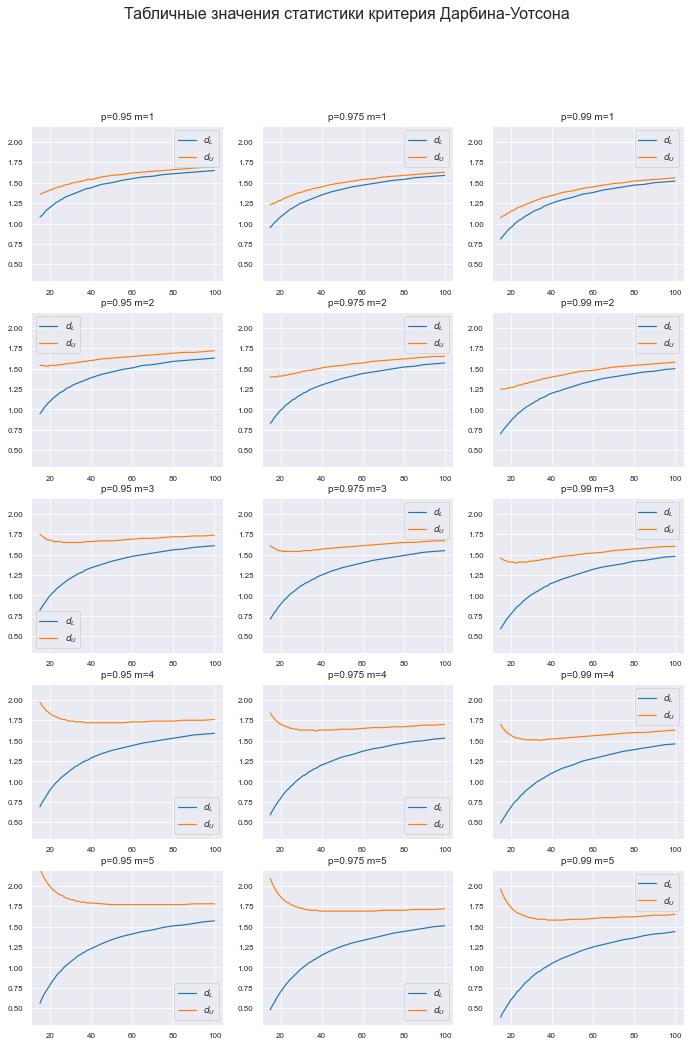

In [27]:
# меняем настройки Mathplotlib
plt.rcParams['axes.titlesize'] = 10      # шрифт заголовка
plt.rcParams['legend.fontsize'] = 9      # шрифт легенды
plt.rcParams['xtick.labelsize'] = 8      # шрифт подписей меток
plt.rcParams['ytick.labelsize'] = 8

fig = plt.figure(figsize=(297/INCH, 420/INCH))

ax_1_1 = plt.subplot(5,3,1)
ax_2_1 = plt.subplot(5,3,2)
ax_3_1 = plt.subplot(5,3,3)
ax_1_2 = plt.subplot(5,3,4)
ax_2_2 = plt.subplot(5,3,5)
ax_3_2 = plt.subplot(5,3,6)
ax_1_3 = plt.subplot(5,3,7)
ax_2_3 = plt.subplot(5,3,8)
ax_3_3 = plt.subplot(5,3,9)
ax_1_4 = plt.subplot(5,3,10)
ax_2_4 = plt.subplot(5,3,11)
ax_3_4 = plt.subplot(5,3,12)
ax_1_5 = plt.subplot(5,3,13)
ax_2_5 = plt.subplot(5,3,14)
ax_3_5 = plt.subplot(5,3,15)

fig.suptitle('Табличные значения статистики критерия Дарбина-Уотсона', fontsize = 16)

(Ymin, Ymax) = (0.3, 2.2)
x = Durbin_Watson_test_df.index

title_fontsize = 10

name_1_1 = ['p=0.95', 'm=1']
ax_1_1.set_title(name_1_1[0] + ' ' + name_1_1[1])
ax_1_1.plot(x, Durbin_Watson_test_df[tuple(name_1_1 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_1_1 + ['dU'])])

name_1_2 = ['p=0.95', 'm=2']
ax_1_2.set_title(name_1_2[0] + ' ' + name_1_2[1])
ax_1_2.plot(x, Durbin_Watson_test_df[tuple(name_1_2 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_1_2 + ['dU'])])

name_1_3 = ['p=0.95', 'm=3']
ax_1_3.set_title(name_1_3[0] + ' ' + name_1_3[1])
ax_1_3.plot(x, Durbin_Watson_test_df[tuple(name_1_3 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_1_3 + ['dU'])])

name_1_4 = ['p=0.95', 'm=4']
ax_1_4.set_title(name_1_4[0] + ' ' + name_1_4[1])
ax_1_4.plot(x, Durbin_Watson_test_df[tuple(name_1_4 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_1_4 + ['dU'])])

name_1_5 = ['p=0.95', 'm=5']
ax_1_5.set_title(name_1_5[0] + ' ' + name_1_5[1])
ax_1_5.plot(x, Durbin_Watson_test_df[tuple(name_1_5 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_1_5 + ['dU'])])

name_2_1 = ['p=0.975', 'm=1']
ax_2_1.set_title(name_2_1[0] + ' ' + name_2_1[1])
ax_2_1.plot(x, Durbin_Watson_test_df[tuple(name_2_1 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_2_1 + ['dU'])])

name_2_2 = ['p=0.975', 'm=2']
ax_2_2.set_title(name_2_2[0] + ' ' + name_2_2[1])
ax_2_2.plot(x, Durbin_Watson_test_df[tuple(name_2_2 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_2_2 + ['dU'])])

name_2_3 = ['p=0.975', 'm=3']
ax_2_3.set_title(name_2_3[0] + ' ' + name_2_3[1])
ax_2_3.plot(x, Durbin_Watson_test_df[tuple(name_2_3 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_2_3 + ['dU'])])

name_2_4 = ['p=0.975', 'm=4']
ax_2_4.set_title(name_2_4[0] + ' ' + name_2_4[1])
ax_2_4.plot(x, Durbin_Watson_test_df[tuple(name_2_4 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_2_4 + ['dU'])])

name_2_5 = ['p=0.975', 'm=5']
ax_2_5.set_title(name_2_5[0] + ' ' + name_2_5[1])
ax_2_5.plot(x, Durbin_Watson_test_df[tuple(name_2_5 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_2_5 + ['dU'])])

name_3_1 = ['p=0.99', 'm=1']
ax_3_1.set_title(name_3_1[0] + ' ' + name_3_1[1])
ax_3_1.plot(x, Durbin_Watson_test_df[tuple(name_3_1 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_3_1 + ['dU'])])

name_3_2 = ['p=0.99', 'm=2']
ax_3_2.set_title(name_3_2[0] + ' ' + name_3_2[1])
ax_3_2.plot(x, Durbin_Watson_test_df[tuple(name_3_2 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_3_2 + ['dU'])])

name_3_3 = ['p=0.99', 'm=3']
ax_3_3.set_title(name_3_3[0] + ' ' + name_3_3[1])
ax_3_3.plot(x, Durbin_Watson_test_df[tuple(name_3_3 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_3_3 + ['dU'])])

name_3_4 = ['p=0.99', 'm=4']
ax_3_4.set_title(name_3_4[0] + ' ' + name_3_4[1])
ax_3_4.plot(x, Durbin_Watson_test_df[tuple(name_3_4 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_3_4 + ['dU'])])

name_3_5 = ['p=0.99', 'm=5']
ax_3_5.set_title(name_3_5[0] + ' ' + name_3_5[1])
ax_3_5.plot(x, Durbin_Watson_test_df[tuple(name_3_5 + ['dL'])],
            x, Durbin_Watson_test_df[tuple(name_3_5 + ['dU'])])

ax_1_1.set_ylim(Ymin, Ymax)
ax_2_1.set_ylim(Ymin, Ymax)
ax_3_1.set_ylim(Ymin, Ymax)
ax_1_2.set_ylim(Ymin, Ymax)
ax_2_2.set_ylim(Ymin, Ymax)
ax_3_2.set_ylim(Ymin, Ymax)
ax_1_3.set_ylim(Ymin, Ymax)
ax_2_3.set_ylim(Ymin, Ymax)
ax_3_3.set_ylim(Ymin, Ymax)
ax_1_4.set_ylim(Ymin, Ymax)
ax_2_4.set_ylim(Ymin, Ymax)
ax_3_4.set_ylim(Ymin, Ymax)
ax_1_5.set_ylim(Ymin, Ymax)
ax_2_5.set_ylim(Ymin, Ymax)
ax_3_5.set_ylim(Ymin, Ymax)

legend = (r'$d_L$', r'$d_U$')
ax_1_1.legend(legend)
ax_2_1.legend(legend)
ax_3_1.legend(legend)
ax_1_2.legend(legend)
ax_2_2.legend(legend)
ax_3_2.legend(legend)
ax_1_3.legend(legend)
ax_2_3.legend(legend)
ax_3_3.legend(legend)
ax_1_4.legend(legend)
ax_2_4.legend(legend)
ax_3_4.legend(legend)
ax_1_5.legend(legend)
ax_2_5.legend(legend)
ax_3_5.legend(legend)

plt.show()

# возвращаем настройки Mathplotlib
plt.rcParams['axes.titlesize'] = f_size + 10      # шрифт заголовка
plt.rcParams['legend.fontsize'] = f_size + 6      # шрифт легенды
plt.rcParams['xtick.labelsize'] = f_size + 4      # шрифт подписей меток
plt.rcParams['ytick.labelsize'] = f_size + 4

15. Сохраняем полученный DataFrame в csv-файл, помещаем его в папку **table**, расположенную внутри папки с рабочим **.ipynb-файлом** (в которой папку **table** у нас хранятся файлы с данными из статистических таблиц):

In [28]:
Durbin_Watson_test_df.to_csv(
    path_or_buf='table\Durbin_Watson_test_table.csv',
    mode='w+',
    sep=';',
    index_label='n')

Табличные значения статистики критерия Дарбина-Уотсона у нас теперь имеются, можем приступать к созданию пользовательской функции.

### <center> <font size="6"> <u>***СОЗДАНИЕ ПОЛЬЗОВАТЕЛЬСКОЙ ФУНКЦИИ ДЛЯ РЕАЛИЗАЦИИ КРИТЕРИЯ ДАРБИНА-УОТСОНА***</u>

Рассчитать статистику критерия Дарбина-Уотсона мы можем с помощью функции **statsmodels.stats.stattools.durbin_watson**.

Создадим пользовательскую функцию **Durbin_Watson_test** для проверки гипотезы об автокорреляции:

In [29]:
def Durbin_Watson_test(
    data,
    m = None,
    p_level: float=0.95):
    
    a_level = 1 - p_level
    data = np.array(data)
    n = len(data)
    
    # расчетное значение статистики критерия
    DW_calc = sms.stattools.durbin_watson(data)
    
    # табличное значение статистики критерия
    if (n >= 15) and (n <= 100):
        # восстанавливаем структуру DataFrame из csv-файла
        DW_table_df = pd.read_csv(
            filepath_or_buffer='table/Durbin_Watson_test_table.csv',
            sep=';',
            #index_col='n'
            )
                            
        DW_table_df = DW_table_df.rename(columns={'Unnamed: 0': 'n'})
        DW_table_df = DW_table_df.drop([0, 1, 2])
        
        for col in DW_table_df.columns:
            DW_table_df[col] = pd.to_numeric(DW_table_df[col], errors='ignore')
            
        DW_table_df = DW_table_df.set_index('n')

        DW_table_df.columns = pd.MultiIndex.from_product(
            [['p=0.95', 'p=0.975', 'p=0.99'],
            ['m=1', 'm=2', 'm=3', 'm=4', 'm=5'],
            ['dL','dU']])    
        
        # интерполяция табличных значений
        key = [f'p={p_level}', f'm={m}']
        f_lin_L = sci.interpolate.interp1d(DW_table_df.index, DW_table_df[tuple(key + ['dL'])])
        f_lin_U = sci.interpolate.interp1d(DW_table_df.index, DW_table_df[tuple(key + ['dU'])])
        DW_table_L = float(f_lin_L(n))
        DW_table_U = float(f_lin_U(n))
                   
        # проверка гипотезы
        Durbin_Watson_scale = {
            1: DW_table_L,
            2: DW_table_U,
            3: 4 - DW_table_U,
            4: 4 - DW_table_L,
            5: 4}
        
        Durbin_Watson_comparison = {
            1: ['0 ≤ DW_calc < DW_table_L',                   'H1: r > 0'],
            2: ['DW_table_L ≤ DW_calc ≤ DW_table_U',          'uncertainty'],
            3: ['DW_table_U < DW_calc < 4 - DW_table_U',      'H0: r = 0'],
            4: ['4 - DW_table_U ≤ DW_calc ≤ 4 - DW_table_L',  'uncertainty'],
            5: ['4 - DW_table_L < DW_calc ≤ 4',               'H1: r < 0']}
        
        r_scale = list(Durbin_Watson_scale.values())
        for i, elem in enumerate(r_scale):
            if DW_calc <= elem:
                key_scale = list(Durbin_Watson_scale.keys())[i]
                comparison = Durbin_Watson_comparison[key_scale][0]
                conclusion = Durbin_Watson_comparison[key_scale][1]
                break
           
    elif n < 15:        
        comparison = '-'
        conclusion = 'count less than 15'
    else:
        comparison = '-'
        conclusion = 'count more than 100'
    
    
    # формируем результат            
    result = pd.DataFrame({
        'n': (n),
        'm': (m),
        'p_level': (p_level),
        'a_level': (a_level),
        'DW_calc': (DW_calc),
        'ρ': (1 - DW_calc/2),
        'DW_table_L': (DW_table_L if (n >= 15) and (n <= 100) else '-'),
        'DW_table_U': (DW_table_U if (n >= 15) and (n <= 100) else '-'),
        'comparison of calculated and critical values': (comparison),
        'conclusion': (conclusion)
        },
        index=['Durbin-Watson_test'])
    
    
    return result

Протестируем созданную функцию - будем моделировать временные ряды с различными свойствами и выполнять проверку автокорреляции:

In [30]:
y_func = lambda x, b0, b1: b0 + b1*x

N = 30    # число наблюдений
(mu, sigma) = (0, 25)    # параметры моделируемой случайной компоненты (среднее и станд.отклонение)

1. Смоделируем **временной ряд с трендом, без автокорреляции остатков**:

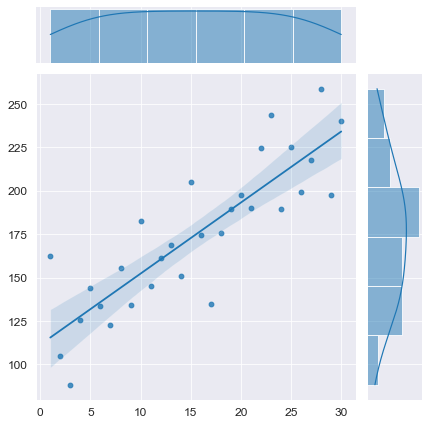

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,30,1,0.9500,0.0500,0.0339,0.9831,1.3500,1.4900,0 ≤ DW_calc < DW_table_L,H1: r > 0


In [31]:
# моделирование
T_model = np.linspace(1, N, N)    # независимая переменная - номер наблюдения
(b0, b1) = (100, 5)    # параметры моделируемого временного ряда
Y_model = np.array(y_func(T_model, b0, b1)) + np.random.normal(mu, sigma, N)

# визуализация
axes = sns.jointplot(
    x=T_model, y=Y_model,
    kind='reg')
plt.show()

# проверка автокорреляции
display(Durbin_Watson_test(Y_model, m=1, p_level=0.95))

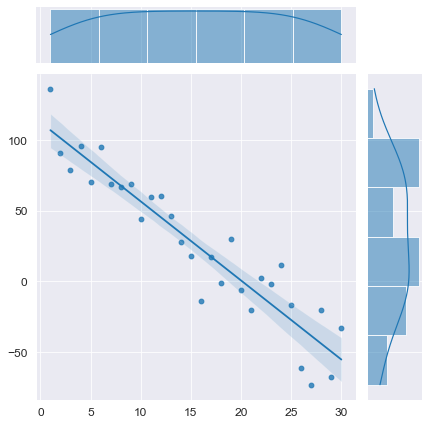

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,30,1,0.9500,0.0500,0.2067,0.8967,1.3500,1.4900,0 ≤ DW_calc < DW_table_L,H1: r > 0


In [32]:
# моделирование
T_model = np.linspace(1, N, N)    # независимая переменная - номер наблюдения
(b0, b1) = (100, -5)    # параметры моделируемого временного ряда
Y_model = np.array(y_func(T_model, b0, b1)) + np.random.normal(mu, sigma, N)

# визуализация
axes = sns.jointplot(
    x=T_model, y=Y_model,
    kind='reg')
plt.show()

# проверка автокорреляции
display(Durbin_Watson_test(Y_model, m=1, p_level=0.95))

2. Смоделируем **временной ряд без тренда**:

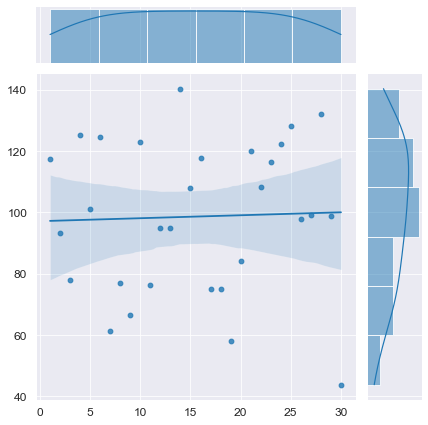

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,30,1,0.9500,0.0500,0.0906,0.9547,1.3500,1.4900,0 ≤ DW_calc < DW_table_L,H1: r > 0


In [33]:
# моделирование
T_model = np.linspace(1, N, N)    # независимая переменная - номер наблюдения
(b0, b1) = (100, 0)    # параметры моделируемого временного ряда
Y_model = np.array(y_func(T_model, b0, b1)) + np.random.normal(mu, sigma, N)

# визуализация
axes = sns.jointplot(
    x=T_model, y=Y_model,
    kind='reg')
plt.show()

# проверка автокорреляции
display(Durbin_Watson_test(Y_model, m=1, p_level=0.95))

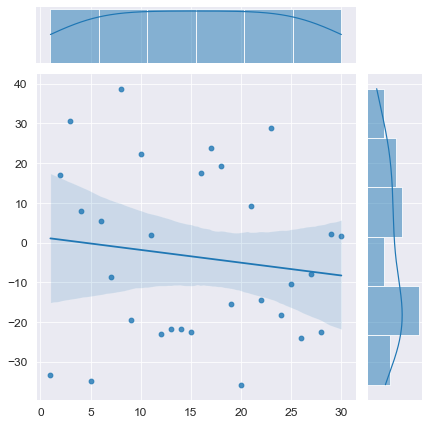

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,30,1,0.9500,0.0500,1.9607,0.0197,1.3500,1.4900,DW_table_U < DW_calc < 4 - DW_table_U,H0: r = 0


In [34]:
# моделирование
T_model = np.linspace(1, N, N)    # независимая переменная - номер наблюдения
(b0, b1) = (0, 0)    # параметры моделируемого временного ряда
Y_model = np.array(y_func(T_model, b0, b1)) + np.random.normal(mu, sigma, N)

# визуализация
axes = sns.jointplot(
    x=T_model, y=Y_model,
    kind='reg')
plt.show()

# проверка автокорреляции
display(Durbin_Watson_test(Y_model, m=1, p_level=0.95))

3. Смоделируем **временной ряд с трендом, с положительной автокорреляцией**:

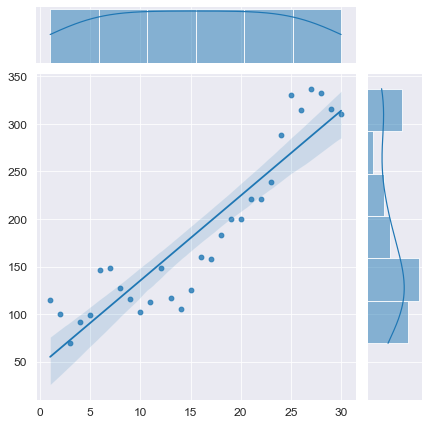

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,30,1,0.9500,0.0500,0.0128,0.9936,1.3500,1.4900,0 ≤ DW_calc < DW_table_L,H1: r > 0


In [35]:
# моделирование
T_model = np.linspace(1, N, N)    # независимая переменная - номер наблюдения
(b0, b1) = (100, 5)    # параметры моделируемого временного ряда

E = np.array([np.random.normal(mu, sigma, 1)])
r = 0.9
for i in range(1, N):
    elem = r*E[i-1] + np.random.normal(mu, sigma, 1)
    E = np.append(E, elem)
Y_model = np.array(y_func(T_model, b0, b1)) + E

# визуализация
axes = sns.jointplot(
    x=T_model, y=Y_model,
    kind='reg')
plt.show()

# проверка автокорреляции
display(Durbin_Watson_test(Y_model, m=1, p_level=0.95))

4. Смоделируем **временной ряд с трендом, с отрицательной автокорреляцией**:

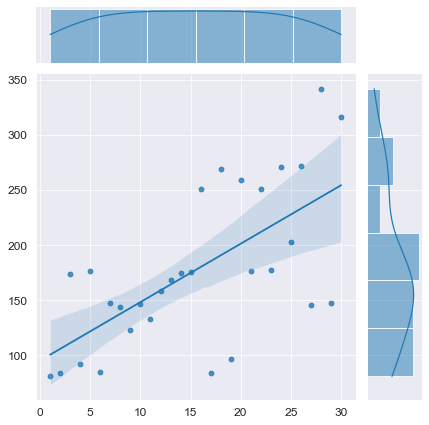

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,30,1,0.9500,0.0500,0.2899,0.8550,1.3500,1.4900,0 ≤ DW_calc < DW_table_L,H1: r > 0


In [36]:
# моделирование
T_model = np.linspace(1, N, N)    # независимая переменная - номер наблюдения
(b0, b1) = (100, 5)    # параметры моделируемого временного ряда

E = np.array([np.random.normal(mu, sigma, 1)])
r = -0.9
for i in range(1, N):
    elem = r*E[i-1] + np.random.normal(mu, sigma, 1)
    E = np.append(E, elem)
Y_model = np.array(y_func(T_model, b0, b1)) + E

# визуализация
axes = sns.jointplot(
    x=T_model, y=Y_model,
    kind='reg')
plt.show()

# проверка автокорреляции
display(Durbin_Watson_test(Y_model, m=1, p_level=0.95))

5. Смоделируем **временной ряд без тренда, с положительной автокорреляцией**:

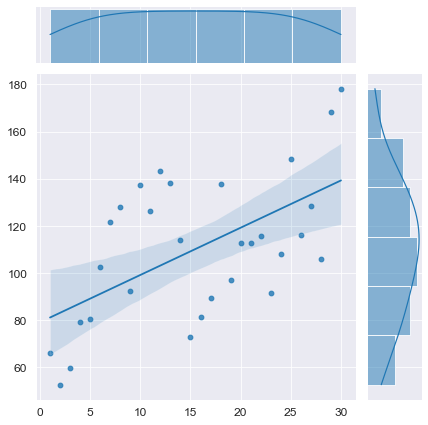

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,30,1,0.9500,0.0500,0.0512,0.9744,1.3500,1.4900,0 ≤ DW_calc < DW_table_L,H1: r > 0


In [37]:
# моделирование
T_model = np.linspace(1, N, N)    # независимая переменная - номер наблюдения
(b0, b1) = (100, 0)    # параметры моделируемого временного ряда

E = np.array([np.random.normal(mu, sigma, 1)])
r = 0.9
for i in range(1, N):
    elem = r*E[i-1] + np.random.normal(mu, sigma, 1)
    E = np.append(E, elem)
Y_model = np.array(y_func(T_model, b0, b1)) + E

# визуализация
axes = sns.jointplot(
    x=T_model, y=Y_model,
    kind='reg')
plt.show()

# проверка автокорреляции
display(Durbin_Watson_test(Y_model, m=1, p_level=0.95))

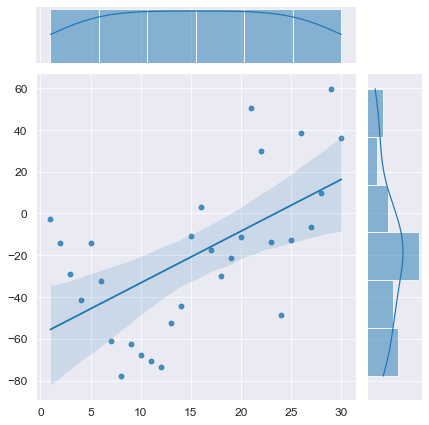

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,30,1,0.9500,0.0500,0.4267,0.7867,1.3500,1.4900,0 ≤ DW_calc < DW_table_L,H1: r > 0


In [38]:
# моделирование
T_model = np.linspace(1, N, N)    # независимая переменная - номер наблюдения
(b0, b1) = (0, 0)    # параметры моделируемого временного ряда

E = np.array([np.random.normal(mu, sigma, 1)])
r = 0.9
for i in range(1, N):
    elem = r*E[i-1] + np.random.normal(mu, sigma, 1)
    E = np.append(E, elem)
Y_model = np.array(y_func(T_model, b0, b1)) + E

# визуализация
axes = sns.jointplot(
    x=T_model, y=Y_model,
    kind='reg')
plt.show()

# проверка автокорреляции
display(Durbin_Watson_test(Y_model, m=1, p_level=0.95))

6. Смоделируем **временной ряд без тренда, с отрицательной автокорреляцией**:

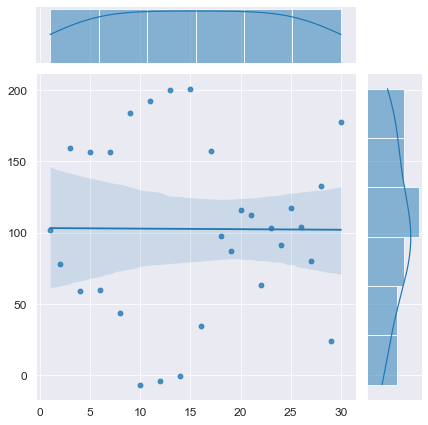

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,30,1,0.9500,0.0500,0.9566,0.5217,1.3500,1.4900,0 ≤ DW_calc < DW_table_L,H1: r > 0


In [39]:
# моделирование
T_model = np.linspace(1, N, N)    # независимая переменная - номер наблюдения
(b0, b1) = (100, 0)    # параметры моделируемого временного ряда

E = np.array([np.random.normal(mu, sigma, 1)])
r = -0.9
for i in range(1, N):
    elem = r*E[i-1] + np.random.normal(mu, sigma, 1)
    E = np.append(E, elem)
Y_model = np.array(y_func(T_model, b0, b1)) + E

# визуализация
axes = sns.jointplot(
    x=T_model, y=Y_model,
    kind='reg')
plt.show()

# проверка автокорреляции
display(Durbin_Watson_test(Y_model, m=1, p_level=0.95))

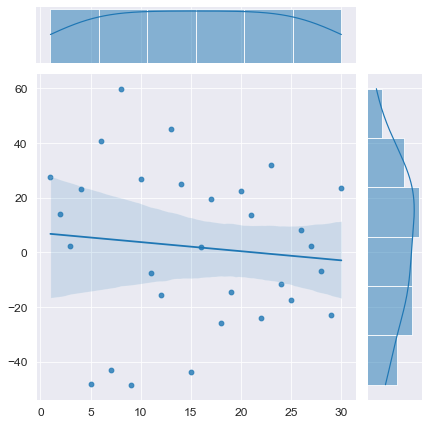

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,30,1,0.9500,0.0500,3.1001,-0.5500,1.3500,1.4900,4 - DW_table_L < DW_calc ≤ 4,H1: r < 0


In [40]:
# моделирование
T_model = np.linspace(1, N, N)    # независимая переменная - номер наблюдения
(b0, b1) = (0, 0)    # параметры моделируемого временного ряда

E = np.array([np.random.normal(mu, sigma, 1)])
r = -0.9
for i in range(1, N):
    elem = r*E[i-1] + np.random.normal(mu, sigma, 1)
    E = np.append(E, elem)
Y_model = np.array(y_func(T_model, b0, b1)) + E

# визуализация
axes = sns.jointplot(
    x=T_model, y=Y_model,
    kind='reg')
plt.show()

# проверка автокорреляции
display(Durbin_Watson_test(Y_model, m=1, p_level=0.95))

Конечно, данный вычислительный эксперимент не может претендовать на всеобъемлемость, однако определенный любопытный предварительный вывод можно сделать: при наличии любого тренда (даже если этот тренда представляет собой равенство постоянной величине $Y=b_0 + \varepsilon$) критерий Дарбина-Уотсона выдает нам наличие положительной автокорреляции (даже если в модели автокорреляция не заложена нет или она отрицательная). Такой вывод нужно исследовать более глубоко, но это не входит в цель данного обзора. Специалист должен помнить об особенностях критерия Дарбина-Уотсона.

Теперь мы можем перейти к практическим примерам.

### <center> <font size="6"> <u>***ПРИМЕР 1: проверка автокорреляция модели временного ряда***</u>

#### <center> <font size="6"> ***Формирование исходных данных***

В качестве исходных данных рассмотрим динамику показателей индексов пересчета сметной стоимости проектно-изыскательских работ в РФ. Эти показатели ежеквартально публикует Министерство строительства и ЖКХ РФ, а все проектные и изыскательские организации используют эти показатели при составлении смет на свои работы.

В данном случае мы имеем набор показателей в виде временного ряда, для которого будем строить регрессионную модель долговременной тенденции (тренда), и остатки этой регрессионной модели будем исследовать на автокорреляцию.

Исходные данные содержаться в файле **Ежеквартальные индексы ПИР.xlsx**, который помещен в папку **data**.

Прочитаем xlsx-файл:

In [41]:
data_df = pd.read_excel('data/Ежеквартальные индексы ПИР.xlsx', sheet_name='БД')  
#display(data_df)
display(data_df.head(), data_df.tail())
data_df.info()

,N,ГОД,КВАРТАЛ,ОРГАН,ДОКУМЕНТ,ДАТА,Ипроект2022,Ипроект2021,Ипроект2001,Ипроект1995,Иизыск2022,Иизыск2021,Иизыск2001,Иизыск1991,Иизыск1981,Иизыск1981доп
0,1,2008,4,Минрегион РФ,№26064-СК/08,2008-10-14,NaN,NaN,2.7600,21.2500,NaN,NaN,2.8300,32.2300,NaN,NaN
1,2,2009,1,Минрегион РФ,№3652-СК/08,2009-02-12,NaN,NaN,2.8300,21.8300,NaN,NaN,2.9000,33.0200,NaN,NaN
2,3,2009,2,Минрегион РФ,№10217-СК/08,2009-04-09,NaN,NaN,2.9700,22.8700,NaN,NaN,3.0300,34.5300,NaN,NaN
3,4,2009,3,Минрегион РФ,№21713-СК/08,2009-07-13,NaN,NaN,3.0300,23.3600,NaN,NaN,3.0900,35.2600,NaN,NaN
4,5,2009,4,Минрегион РФ,№33498-СК/08,2009-10-13,NaN,NaN,3.0800,23.7200,NaN,NaN,3.1400,35.8100,NaN,NaN


,N,ГОД,КВАРТАЛ,ОРГАН,ДОКУМЕНТ,ДАТА,Ипроект2022,Ипроект2021,Ипроект2001,Ипроект1995,Иизыск2022,Иизыск2021,Иизыск2001,Иизыск1991,Иизыск1981,Иизыск1981доп
51,52,2021,3,Минстрой РФ,№33267-ИФ/09,2021-08-09,NaN,NaN,4.6600,35.7100,NaN,NaN,4.7300,53.7300,NaN,NaN
52,53,2021,4,Минстрой РФ,№46012-ИФ/09,2021-10-25,NaN,NaN,4.7500,36.4200,NaN,NaN,4.8200,54.7500,66.2500,82.1300
53,54,2022,1,Минстрой РФ,№4153-ИФ/09,2022-02-07,NaN,NaN,4.8300,37.0000,NaN,NaN,4.8900,55.5700,67.2400,83.3600
54,55,2022,2,Минстрой РФ,№19281-ИФ/09,2022-04-29,NaN,NaN,4.9100,37.5900,NaN,NaN,4.9600,56.4000,68.2400,84.6000
55,56,2022,3,Минстрой РФ,№39010-ИФ/09,2022-08-05,1.1000,1.2000,5.0700,38.7900,1.1100,1.2000,5.1200,58.2600,70.4900,87.3900


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   N              56 non-null     int64         
 1   ГОД            56 non-null     int64         
 2   КВАРТАЛ        56 non-null     int64         
 3   ОРГАН          56 non-null     object        
 4   ДОКУМЕНТ       52 non-null     object        
 5   ДАТА           52 non-null     datetime64[ns]
 6   Ипроект2022    1 non-null      float64       
 7   Ипроект2021    1 non-null      float64       
 8   Ипроект2001    52 non-null     float64       
 9   Ипроект1995    52 non-null     float64       
 10  Иизыск2022     1 non-null      float64       
 11  Иизыск2021     1 non-null      float64       
 12  Иизыск2001     52 non-null     float64       
 13  Иизыск1991     52 non-null     float64       
 14  Иизыск1981     4 non-null      float64       
 15  Иизыск1981доп  4 non-null

Не будем подробно останавливаться на содержимом файла и его первичной обработке - это выходит за пределы данного обзора. Специалисты, причастные к сфере строительства и проектирования, поймут, а для остальных специалистов эти цифры можно воспринимать по аналогии с индексами инфляции Росстата и Минэкономразвития.

Прочитаем из этого файла интересующие нас данные - **индексы изменения сметной стоимости <u>проектных работ</u> к уровню цен на <u>01.01.2001 г.</u>**:

In [42]:
Ind_design_2001 = np.array(data_df['Ипроект2001'])
print(Ind_design_2001, '\n', type(Ind_design_2001), len(Ind_design_2001))

[2.7600 2.8300 2.9700 3.0300 3.0800 3.0500 3.0500 3.1300 3.1300 3.1300
 3.1900 3.2700 3.3100 3.3500 3.4200 3.4600 3.5300 3.5800 3.6000 3.6400
 3.6400 3.6400 3.6400 3.7000 3.7000 3.7300 3.7300 3.8400 3.8400 3.9200
 3.9200 3.9200 3.9500 3.9900 3.9900    nan 3.9900 3.8300    nan    nan
    nan 4.0900 4.1500 4.2100 4.2700 4.3200 4.3700 4.4200 4.4700 4.5300
 4.5900 4.6600 4.7500 4.8300 4.9100 5.0700] 
 <class 'numpy.ndarray'> 56


Сохраним также вспомогательные (технические) переменные, необходимые при анализе временных рядов - дату (**Date**) и номер наблюдения (**T**):

In [43]:
# Дата показателя
Date = np.array(data_df['ДАТА'])
print(Date, type(Date), len(Date))

['2008-10-14T00:00:00.000000000' '2009-02-12T00:00:00.000000000'
 '2009-04-09T00:00:00.000000000' '2009-07-13T00:00:00.000000000'
 '2009-10-13T00:00:00.000000000' '2010-01-20T00:00:00.000000000'
 '2010-05-26T00:00:00.000000000' '2010-07-26T00:00:00.000000000'
 '2010-11-18T00:00:00.000000000' '2011-03-02T00:00:00.000000000'
 '2011-06-09T00:00:00.000000000' '2011-07-15T00:00:00.000000000'
 '2011-11-07T00:00:00.000000000' '2012-01-28T00:00:00.000000000'
 '2012-05-04T00:00:00.000000000' '2012-08-01T00:00:00.000000000'
 '2012-12-03T00:00:00.000000000' '2013-02-12T00:00:00.000000000'
 '2013-06-07T00:00:00.000000000' '2013-07-29T00:00:00.000000000'
 '2013-11-12T00:00:00.000000000' '2014-02-28T00:00:00.000000000'
 '2014-05-15T00:00:00.000000000' '2014-08-04T00:00:00.000000000'
 '2014-11-13T00:00:00.000000000' '2015-02-12T00:00:00.000000000'
 '2015-06-26T00:00:00.000000000' '2015-08-13T00:00:00.000000000'
 '2015-12-14T00:00:00.000000000' '2016-02-19T00:00:00.000000000'
 '2016-06-03T00:00:00.000

In [44]:
# Номер наблюдения
T = np.array(data_df['N'])
print(T, type(T), len(T))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56] <class 'numpy.ndarray'> 56


Для удобства дальнейшей работы сформируем сформируем отдельный DataFrame:

In [45]:
dataset_df = pd.DataFrame({
    'T': T,
    'Date': Date,
    'Ind_design_2001': Ind_design_2001})
display(dataset_df.head(), dataset_df.tail())

,T,Date,Ind_design_2001
0,1,2008-10-14,2.7600
1,2,2009-02-12,2.8300
2,3,2009-04-09,2.9700
3,4,2009-07-13,3.0300
4,5,2009-10-13,3.0800


,T,Date,Ind_design_2001
51,52,2021-08-09,4.6600
52,53,2021-10-25,4.7500
53,54,2022-02-07,4.8300
54,55,2022-04-29,4.9100
55,56,2022-08-05,5.0700


#### <center> <font size="6"> ***Визуализация***

Настройка заголовков:

In [46]:
# Общий заголовок проекта
Task_Project = "Анализ динамики индексов изменения сметной стоимости проектно-изыскательских работ в РФ"
# Заголовок, фиксирующий момент времени
AsOfTheDate = "за 2008-2022 гг."
# Заголовок раздела проекта
Task_Theme = ""
# Общий заголовок проекта для графиков
Title_String = f"{Task_Project}\n{AsOfTheDate}"
# Наименования переменных
Variable_Name_T_month = "Ежемесячные данные"
Variable_Name_Ind_design_2001 = "Индекс изменения сметной стоимости проектных работ к уровню цен на 01.01.2001 г."

Границы значений переменных (при построении графиков):

In [47]:
(X_min_graph, X_max_graph) = (0.0, max(T))
(Y_min_graph, Y_max_graph) = (2.0, 6.0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


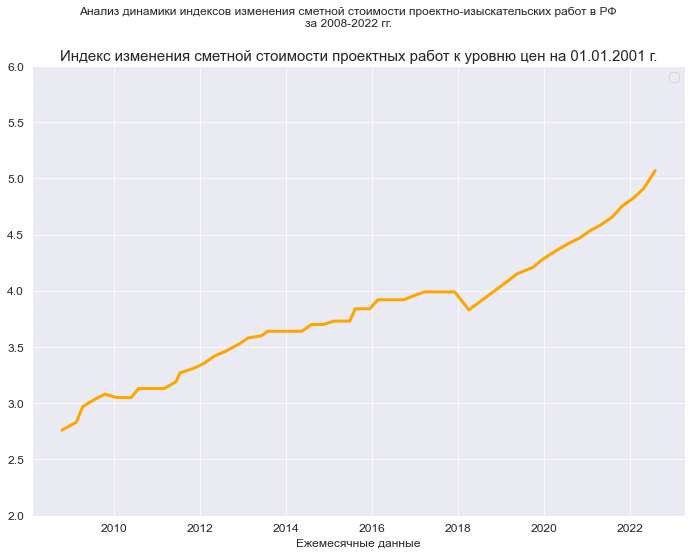

In [48]:
graph_plot_sns_np(
    Date, Ind_design_2001,
    Ymin_in=Y_min_graph, Ymax_in=Y_max_graph,
    color='orange',
    title_figure=Title_String, title_figure_fontsize=12,
    title_axes=Variable_Name_Ind_design_2001, title_axes_fontsize=15,
    x_label=Variable_Name_T_month, label_fontsize=12
    #y_label=Variable_Name_Ind_design_2001,
    #label_legend='эмпирические данные',
    #file_name='graph/plot_Date_Y_sns_np.png'
    )

#### <center> <font size="6"> ***Построение и анализ регрессионной модели***

Построим линейную регрессионную модель и проведем ее экспресс-анализ:

In [49]:
model_linear_ols_1 = smf.ols(formula='Ind_design_2001 ~ T', data=dataset_df)
result_linear_ols_1 = model_linear_ols_1.fit()
print(result_linear_ols_1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.970   
Dependent Variable: Ind_design_2001  AIC:                -89.6300
Date:               2022-10-14 15:39 BIC:                -85.7275
No. Observations:   52               Log-Likelihood:     46.815  
Df Model:           1                F-statistic:        1625.   
Df Residuals:       50               Prob (F-statistic): 8.56e-40
R-squared:          0.970            Scale:              0.010060
-------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept   2.8493     0.0272   104.8162   0.0000   2.7947   2.9039
T           0.0340     0.0008    40.3071   0.0000   0.0323   0.0357
-----------------------------------------------------------------
Omnibus:               6.286        Durbin-Watson:          0.268
Prob(Omnibus):   

Функция линейной регрессионной модели (SLRM - simple linear regression model):

In [50]:
SLRM_func = lambda x, b0, b1: b0 + b1*x

Формализация модели:

In [51]:
# параметры модели
b0 = result_linear_ols_1.params['Intercept']
b1 = result_linear_ols_1.params['T']

# уравнение модели
regr_model_linear_ols_1_func = lambda x: SLRM_func(x, b0, b1)

График модели:

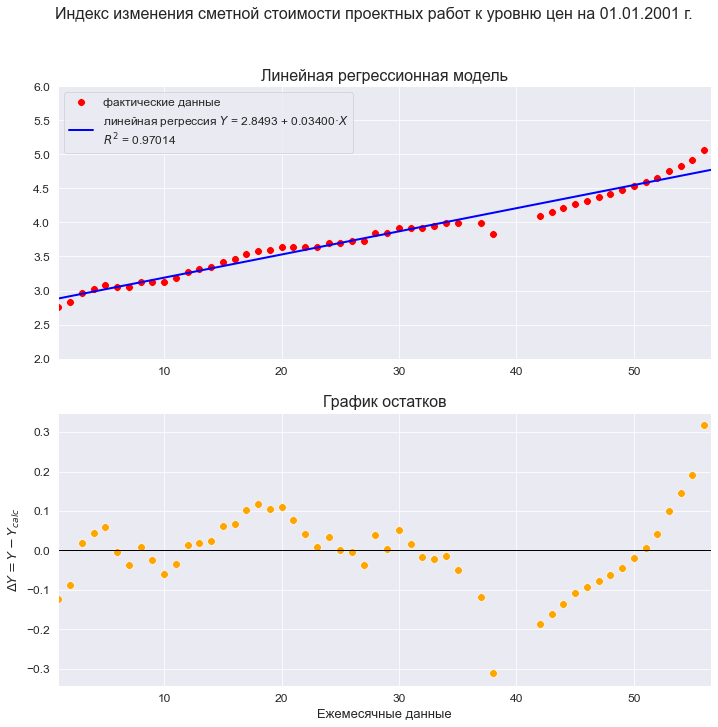

In [52]:
R2 = round(result_linear_ols_1.rsquared, DecPlace)
legend_equation = f'линейная регрессия ' + r'$Y$' + f' = {b0:.4f} + {b1:.5f}{chr(183)}' + r'$X$' if b1 > 0 else \
                  f'линейная регрессия ' + r'$Y$' + f' = {b0:.4f} - {abs(b1):.5f}{chr(183)}' + r'$X$'

# Пользовательская функция
graph_regression_plot_sns(
    T, Ind_design_2001,
    regression_model=regr_model_linear_ols_1_func,
    #Xmin=X_min_graph, Xmax=X_max_graph,
    Ymin=Y_min_graph, Ymax=Y_max_graph,
    display_residuals=True,
    title_figure=Variable_Name_Ind_design_2001, title_figure_fontsize=16,
    title_axes = 'Линейная регрессионная модель',
    x_label=Variable_Name_T_month,
    #y_label=Variable_Name_Ind_design_2001,
    label_legend_regr_model = legend_equation + '\n' + r'$R^2$' + f' = {R2}',
    s=60,
    #file_name='graph/regression_plot_sns_linear_ols.png'
    )

Ошибки аппроксимации модели:

In [53]:
(model_error_metrics, result) = regression_error_metrics(model_linear_ols_1, model_name='linear_ols')
display(result)

,MSE,RMSE,MAE,MSPE,MAPE
linear_ols,0.0097,0.0983,0.0704,0.059%,1.806%


Проверка нормальности распределения остатков:

In [54]:
res_Y_1 = np.array(result_linear_ols_1.resid)

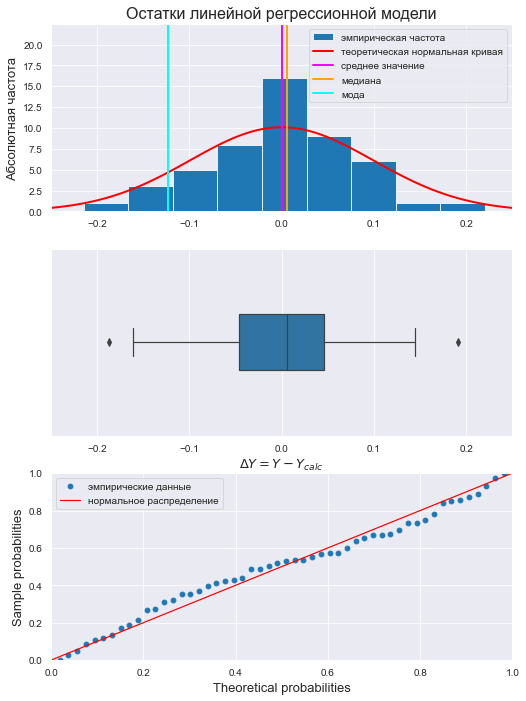

In [55]:
# Пользовательская функция
graph_hist_boxplot_probplot_sns(
    data=res_Y_1,
    data_min=-0.25, data_max=0.25,
    graph_inclusion='hbp',
    data_label=r'$ΔY = Y - Y_{calc}$',
    #title_figure=Task_Project,
    title_axes='Остатки линейной регрессионной модели', title_axes_fontsize=16,
    #file_name='graph/residuals_hist_boxplot_probplot_sns.png'
    )    

In [56]:
norm_distr_check(res_Y_1)

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.9500,0.0500,0.1100,True,0.9634,,,gaussian distribution
1,Epps-Pulley test,0.9500,0.0500,0.0704,True,0.3386,0.3744,True,gaussian distribution
2,D'Agostino's K-squared test,0.9500,0.0500,0.0432,False,6.2856,,,not gaussian distribution
3,Anderson-Darling test,0.9500,0.0500,,,0.5808,0.7370,True,gaussian distribution
4,Kolmogorov–Smirnov test,0.9500,0.0500,0.0000,False,0.4065,,,not gaussian distribution
5,Lilliefors test,0.9500,0.0500,0.4773,True,0.0843,,,gaussian distribution
6,Cramér–von Mises test,0.9500,0.0500,0.0000,False,3.3321,,,not gaussian distribution
7,Chi-squared test,0.9500,0.0500,-,-,-,,,count less than 100
8,Jarque–Bera test,0.9500,0.0500,-,-,-,,,count less than 2000
9,skewtest,0.9500,0.0500,0.9396,True,-0.0758,,,gaussian distribution


Проверка гетероскедастичности:

In [57]:
Goldfeld_Quandt_test_df = Goldfeld_Quandt_test(result_linear_ols_1, p_level=0.95, model_name='linear_ols')
Breush_Pagan_test_df = Breush_Pagan_test(result_linear_ols_1, p_level=0.95, model_name='linear_ols')
White_test_df = White_test(result_linear_ols_1, p_level=0.95, model_name='linear_ols')

heteroscedasticity_tests_df = pd.concat([Breush_Pagan_test_df, White_test_df, Goldfeld_Quandt_test_df])
display(heteroscedasticity_tests_df)

,test,p_level,a_level,Lagrange_multiplier_statistic,p_calc_LM,p_calc_LM < a_level,F_statistic,p_calc,p_calc < a_level,heteroscedasticity_check
linear_ols,Breush-Pagan test,0.9500,0.0500,6.9442,0.0084,True,7.7062,0.0077,True,heteroscedasticity
linear_ols,White test,0.9500,0.0500,8.9858,0.0112,True,5.1181,0.0096,True,heteroscedasticity
linear_ols,Goldfeld–Quandt test,0.9500,0.0500,NaN,NaN,NaN,5.1743,0.0001,True,heteroscedasticity


Проверка автокорреляции:

In [58]:
sms.stattools.durbin_watson(res_Y_1)

0.26790431692845407

Как видим, результат совпадает со значением статистики критерия в таблице выдачи регрессионного анализа.

In [59]:
display(Durbin_Watson_test(res_Y_1, m=1, p_level=0.95))

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,52,1,0.9500,0.0500,0.2679,0.8660,1.5120,1.5940,0 ≤ DW_calc < DW_table_L,H1: r > 0


**Выводы по результатам анализа модели:**

Итак, мы провели статистический анализ регрессионной модели и установили:
1. Регрессионная модель хорошо аппроксимирует фактические данные.
2. Остатки модели имеют нормальное распределение (хотя результаты тестов противоречивы).
3. Коэффициент детерминации значим; модель объясняет 97% вариации независимой переменной.
4. Коэффициенты регрессии значимы.
5. Обнаружена гетероскедастичность.
6. Тест критерия Дарбина-Уотсона свидетельствует о наличии значимой положительной автокорреляции остатков.

**Резюме** - несмотря на вроде бы формально хорошие качественные показатели, нам следует признать эту модель некачественной и отвергнуть по следующим негативным причинам:
1. На графике модели хорошо заметна точка излома, которая говорит о смене тенденции (существуют специальные статистические тесты для проверки гипотез о смене тенденции, например, тест Чоу, но мы в данном обзоре рассматривать их не будем).
2. График остатков показывает нам крайне неприглядную картину: на начальном этапе тенденции явно прослеживаются колебания, а после точки излома тенденция вообще кардинально меняется.
3. Противоречивость тестов проверки нормальности распределения остатков.
4. Наличие гетероскедастичности.
5. Наличие автокорреляции. Явление автокорреляции может возникать в случае смены тенденции [5, с.118].

Тот факт, что распределение остатков признается нормальным по результатам таких тестов как Шапиро-Уилка, Эппса-Палли, Андерсона-Дарлинга может иметь разные причины, например, мы можем иметь дело со смесью двух распределений. Этот вопрос требует отдельного тщательного исследования.

Применение построенной модели приведет к ошибке, так как модель хорошо аппроксимирует существующие данные, но из-за смены тенденции неспособна дать качественный прогноз. Проиллюстрировать это можно, построив доверительный интервалы прогноза (формально мы можем это сделать, так как распределение остатков признано нормальным):

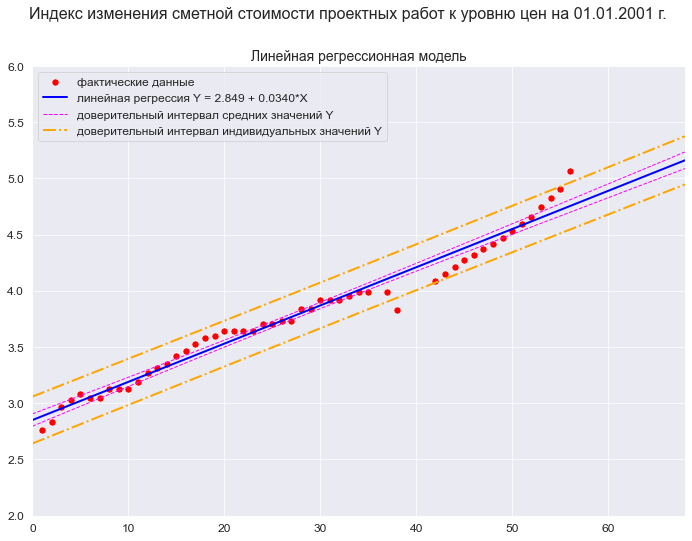

In [60]:
graph_regression_pair_predict_plot_sns(
    model_fit=result_linear_ols_1,
    regression_model_in=regr_model_linear_ols_1_func,
    Xmin=X_min_graph, Xmax=X_max_graph+12, Nx=25,
    Ymin_graph=2.0, Ymax_graph=Y_max_graph,
    title_figure=Variable_Name_Ind_design_2001, title_figure_fontsize=16,
    title_axes='Линейная регрессионная модель', title_axes_fontsize=14,
    #x_label=Variable_Name_X,
    #y_label=Variable_Name_Y,
    label_legend_regr_model=f'линейная регрессия Y = {b0:.3f} + {b1:.4f}*X',
    s=50,
    result_output=False,
    #file_name='graph/regression_plot_lin.png'
    )

Нет, такой прогноз нам не нужен.

### <center> <font size="6"> <u>***ПРИМЕР 2: проверка автокорреляция регрессионной модели***</u>

#### <center> <font size="6"> ***Формирование исходных данных***

Рассмотрим пример множественной линейной регрессионной модели, приведенный в источнике [6, с.192].

В качестве исходных данных рассматриваются ряд макроэкономических показателей США за 1960-1985 гг. (в сопоставимых ценах 1982 г., млрд.долл):
* **DPI** - годовой совокупный располагаемый личный доход;
* **CONS** - годовые совокупные потребительские расходы;
* **ASSETS** - финансовые активы населения на начало календарного года.

Предполагается, что между переменной **CONS** и регрессорами **DPI**, **ASSETS** имеется линейная регрессионная связь.

Исходные данные содержаться в файле **Macroeconomic_indicators_USA_1960_1985.csv**, который помещен в папку **data**.

Прочитаем csv-файл:

In [61]:
data_df = pd.read_csv(filepath_or_buffer='data/Macroeconomic_indicators_USA_1960_1985.csv', sep=';')
display(data_df)
#display(data_df.head(), data_df.tail())
data_df.info()

,YEAR,DPI,CONS,ASSETS
0,1960,1090.9000,1005.2000,1203.1000
1,1961,1122.5000,1024.3000,1226.7000
2,1962,1168.7000,1067.6000,1293.7000
3,1963,1208.7000,1109.6000,1374.9000
4,1964,1289.7000,1169.4000,1464.5000
5,1965,1367.4000,1237.9000,1544.0000
6,1966,1433.0000,1300.5000,1641.6000
7,1967,1494.9000,1339.4000,1675.2000
8,1968,1551.1000,1405.9000,1772.6000
9,1969,1601.7000,1458.3000,1854.7000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    26 non-null     int64  
 1   DPI     26 non-null     float64
 2   CONS    26 non-null     float64
 3   ASSETS  26 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 960.0 bytes


#### <center> <font size="6"> ***Визуализация***

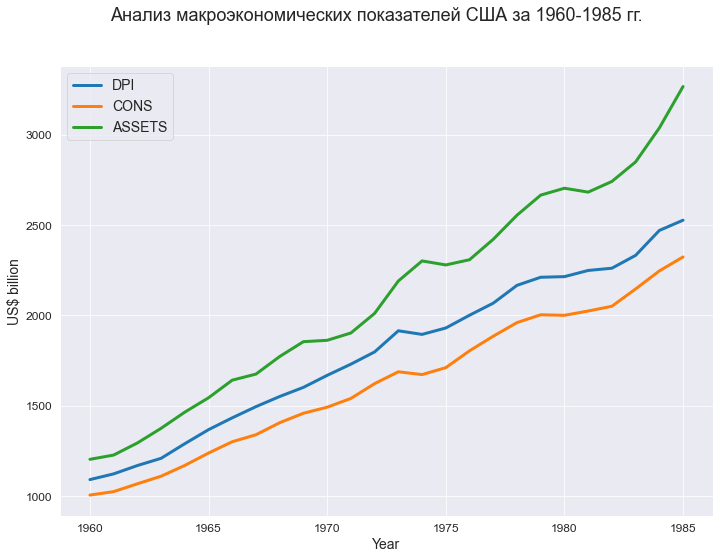

In [62]:
fig, axes = plt.subplots(figsize=(297/INCH, 210/INCH))

title_figure = 'Анализ макроэкономических показателей США за 1960-1985 гг.'
fig.suptitle(title_figure, fontsize = 18)

sns.lineplot(
    x = data_df['YEAR'], y = data_df['DPI'],
    linewidth=3,
    legend=True,
    label='DPI',
    ax=axes)

sns.lineplot(
    x = data_df['YEAR'], y = data_df['CONS'],
    linewidth=3,
    legend=True,
    label='CONS',
    ax=axes)

sns.lineplot(
    x = data_df['YEAR'], y = data_df['ASSETS'],
    linewidth=3,
    legend=True,
    label='ASSETS',
    ax=axes)

axes.set_xlabel('Year')
axes.set_ylabel('US$ billion')

plt.show()

#### <center> <font size="6"> ***Построение и анализ регрессионной модели***

Построим линейную регрессионную модель и проведем ее экспресс-анализ:

In [63]:
y = data_df['CONS']
X = data_df[['DPI', 'ASSETS']]
X = sm.add_constant(X)
model_linear_ols_2 = sm.OLS(y, X)
result_linear_ols_2 = model_linear_ols_2.fit()
print(result_linear_ols_2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.998   
Dependent Variable: CONS             AIC:                226.6473
Date:               2022-10-14 15:39 BIC:                230.4216
No. Observations:   26               Log-Likelihood:     -110.32 
Df Model:           2                F-statistic:        6164.   
Df Residuals:       23               Prob (F-statistic): 4.03e-32
R-squared:          0.998            Scale:              320.91  
-------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|    [0.025    0.975]
-------------------------------------------------------------------
const       50.0947    23.6149   2.1213   0.0449   1.2435   98.9459
DPI          0.6723     0.0793   8.4782   0.0000   0.5082    0.8363
ASSETS       0.1741     0.0587   2.9679   0.0069   0.0528    0.2954
-----------------------------------------------------------------
Omnibus:       

График модели:

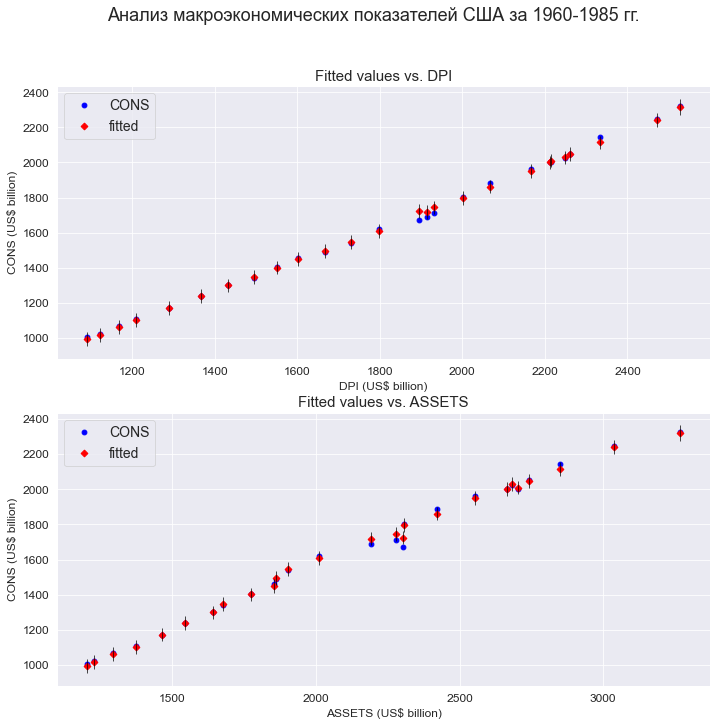

In [64]:
fig = plt.figure(figsize=(297/INCH, 420/INCH/1.5))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

title_figure = 'Анализ макроэкономических показателей США за 1960-1985 гг.'
fig.suptitle(title_figure, fontsize = 18)

fig = sm.graphics.plot_fit(
    result_linear_ols_2, 'DPI',
    vlines=True,    # это параметр отвечает за отображение доверительных интервалов для Y
    ax=ax1)
ax1.set_ylabel('CONS (US$ billion)', fontsize = 12)
ax1.set_xlabel('DPI (US$ billion)', fontsize = 12)
ax1.set_title('Fitted values vs. DPI', fontsize = 15)

fig = sm.graphics.plot_fit(
    result_linear_ols_2, 'ASSETS',
    vlines=True,    # это параметр отвечает за отображение доверительных интервалов для Y
    ax=ax2)
ax2.set_ylabel('CONS (US$ billion)', fontsize = 12)
ax2.set_xlabel('ASSETS (US$ billion)', fontsize = 12)
ax2.set_title('Fitted values vs. ASSETS', fontsize = 15)

plt.show()

Ошибки аппроксимации модели:

In [65]:
(model_error_metrics, result) = regression_error_metrics(model_linear_ols_2, model_name='linear_ols')
display(result)

,MSE,RMSE,MAE,MSPE,MAPE
linear_ols,283.8817,16.8488,11.4712,0.010%,0.702%


Проверка нормальности распределения остатков:

In [66]:
res_Y_2 = np.array(result_linear_ols_2.resid)

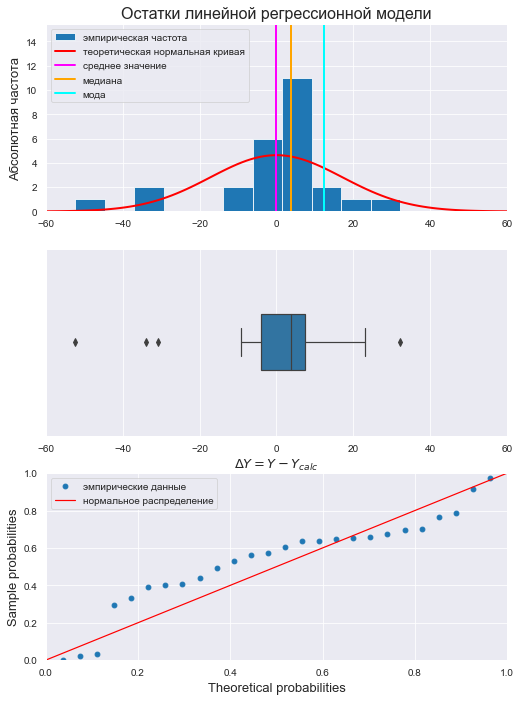

In [67]:
# Пользовательская функция
graph_hist_boxplot_probplot_sns(
    data=res_Y_2,
    data_min=-60, data_max=60,
    graph_inclusion='hbp',
    data_label=r'$ΔY = Y - Y_{calc}$',
    #title_figure=Task_Project,
    title_axes='Остатки линейной регрессионной модели', title_axes_fontsize=16,
    #file_name='graph/residuals_hist_boxplot_probplot_sns.png'
    )    

In [68]:
norm_distr_check(res_Y_2)

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.9500,0.0500,0.0022,False,0.8596,,,not gaussian distribution
1,Epps-Pulley test,0.9500,0.0500,0.0000,False,0.8962,0.3704,False,not gaussian distribution
2,D'Agostino's K-squared test,0.9500,0.0500,0.0014,False,13.1444,,,not gaussian distribution
3,Anderson-Darling test,0.9500,0.0500,,,1.5213,0.7050,False,not gaussian distribution
4,Kolmogorov–Smirnov test,0.9500,0.0500,-,-,-,,,count less than 50
5,Lilliefors test,0.9500,0.0500,0.0088,False,0.2005,,,not gaussian distribution
6,Cramér–von Mises test,0.9500,0.0500,-,-,-,,,count less than 40
7,Chi-squared test,0.9500,0.0500,-,-,-,,,count less than 100
8,Jarque–Bera test,0.9500,0.0500,-,-,-,,,count less than 2000
9,skewtest,0.9500,0.0500,0.0059,False,-2.7516,,,not gaussian distribution


Проверка гетероскедастичности:

In [69]:
Goldfeld_Quandt_test_df = Goldfeld_Quandt_test(result_linear_ols_2, p_level=0.95, model_name='linear_ols')
Breush_Pagan_test_df = Breush_Pagan_test(result_linear_ols_2, p_level=0.95, model_name='linear_ols')
White_test_df = White_test(result_linear_ols_2, p_level=0.95, model_name='linear_ols')

heteroscedasticity_tests_df = pd.concat([Breush_Pagan_test_df, White_test_df, Goldfeld_Quandt_test_df])
display(heteroscedasticity_tests_df)

,test,p_level,a_level,Lagrange_multiplier_statistic,p_calc_LM,p_calc_LM < a_level,F_statistic,p_calc,p_calc < a_level,heteroscedasticity_check
linear_ols,Breush-Pagan test,0.9500,0.0500,0.9946,0.6082,False,0.4574,0.6386,False,not heteroscedasticity
linear_ols,White test,0.9500,0.0500,9.6993,0.0842,False,2.3801,0.0755,False,not heteroscedasticity
linear_ols,Goldfeld–Quandt test,0.9500,0.0500,NaN,NaN,NaN,4.9640,0.0092,True,heteroscedasticity


Проверка автокорреляции:

In [70]:
display(Durbin_Watson_test(res_Y_2, m=1, p_level=0.95))

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,26,1,0.9500,0.0500,1.0147,0.4927,1.3000,1.4600,0 ≤ DW_calc < DW_table_L,H1: r > 0


**Выводы по результатам анализа модели:**

Как видим, в целом результаты расчетов совпадают с результатами из первоисточника [6], в части выявления автокорреляции аналогично.

**Информация к размышлению.** 

Анализ показывает, что модель хорошо аппроксимирует фактические данные, но имеет место отклонение от нормального закона распределения остатков, противоречивые выводы о гетероскедастичности и наличие автокорреляции, то есть модель некачественная.

Также мы видим, что динамика макроэкономических показателей свидетельствует о наличии трендов, однако, если в модель добавить еще один фактор - год или номер наблюдения - то, этот фактор окажется незначимым.

В дальнейшем автор при анализе остатков модели [6, с.198] выявляет структурный сдвиг (обусловленный мировым топливно-энергетическим кризисом в 1973 г.) и вводит в модель фиктивные переменные, учитывающие этот структурный сдвиг

### <center> <font size="6"> <u>***ИТОГИ***</u>

Итак, подведем итоги:
* мы рассмотрели способы реализации в полной мере критерия Дарбина-Уотсона средствами **python**, создали пользовательская функцию, уменьшающую размер кода;
* разобрали пример оцифровки таблицы критических значений статистического критерия для реализации пользовательской функции.

Исходный код находится в моем репозитории на GitHub (https://github.com/AANazarov/Statistical-methods).

Надеюсь, данный обзор поможет специалистам **DataScience** в работе.

### <center> <font size="6"> <u>***ЛИТЕРАТУРА***</u>

1. Кобзарь А.И. Прикладная математическая статистика. Для инженеров и научных работников. - М.: ФИЗМАТЛИТ, 2006. - 816 с.
2. Айвазян С.А. Прикладная статистика. Основы эконометрики: В 2 т. - Т.2: Основы эконометрики. - 2-е изд., испр. - М.: ЮНИТИ-ДАНА, 2001. - 432 с.
3. Фёрстер Э., Рёнц Б. Методы корреляционного и регрессионного анализа / пер с нем. - М.: Финансы и статистика, 1983. - 302 с.
4. Магнус Я.Р. и др. Эконометрика. Начальный курс - М.: Дело, 2004. - 576 с.
5. Тихомиров Н.П., дорохина Е.Ю. Эконометрика. - М.: Экзамен, 2003. - 512 с.
6. Носко В.П. Эконометрика. Кн.1. Ч.1, 2. - М.: Издательский дом "Дело" РАНХиГС, 2011. - 672 с.
7. Вандер Плас Дж. Python для сложных задач: наука о данных и машинное обучение. - СПб: Питер, 2018. - 576 с.

In [71]:
print(f"Общее время выполнения расчетов: {round(time.time() - start_time_0, 3)} c")

Общее время выполнения расчетов: 33.246 c
